In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import datetime
%matplotlib inline

In [348]:
filenames =["PRSA_Data_Aotizhongxin_20130301-20170228.csv","PRSA_Data_Changping_20130301-20170228.csv","PRSA_Data_Dingling_20130301-20170228.csv",
           "PRSA_Data_Dongsi_20130301-20170228.csv","PRSA_Data_Guanyuan_20130301-20170228.csv",
           "PRSA_Data_Gucheng_20130301-20170228.csv","PRSA_Data_Huairou_20130301-20170228.csv","PRSA_Data_Nongzhanguan_20130301-20170228.csv",
           "PRSA_Data_Shunyi_20130301-20170228.csv","PRSA_Data_Tiantan_20130301-20170228.csv","PRSA_Data_Wanliu_20130301-20170228.csv","PRSA_Data_Wanshouxigong_20130301-20170228.csv"]

# broj stanica:
len(filenames)

12

In [349]:
# Baza podataka sa 12 stanica u Pekingu:

dataframes=[]
for f in filenames:
    dataframes.append(pd.read_csv("data/"+f,index_col=0))
df_Dingling = dataframes[2].copy()
df_Huairou = dataframes[6].copy()
df_Aotizhongxin = dataframes[0].copy()
df_Changping = dataframes[1].copy()
df_Dongsi = dataframes[3].copy()
df_Guanyuan = dataframes[4].copy()
df_Nongzhanguan =dataframes[7].copy()
df_Shunyi=dataframes[8].copy()
df_Tiantan=dataframes[9].copy()
df_Wanliu=dataframes[10].copy()
df_Wanshouxigong =dataframes[11].copy()
df_Gucheng =dataframes[5].copy()

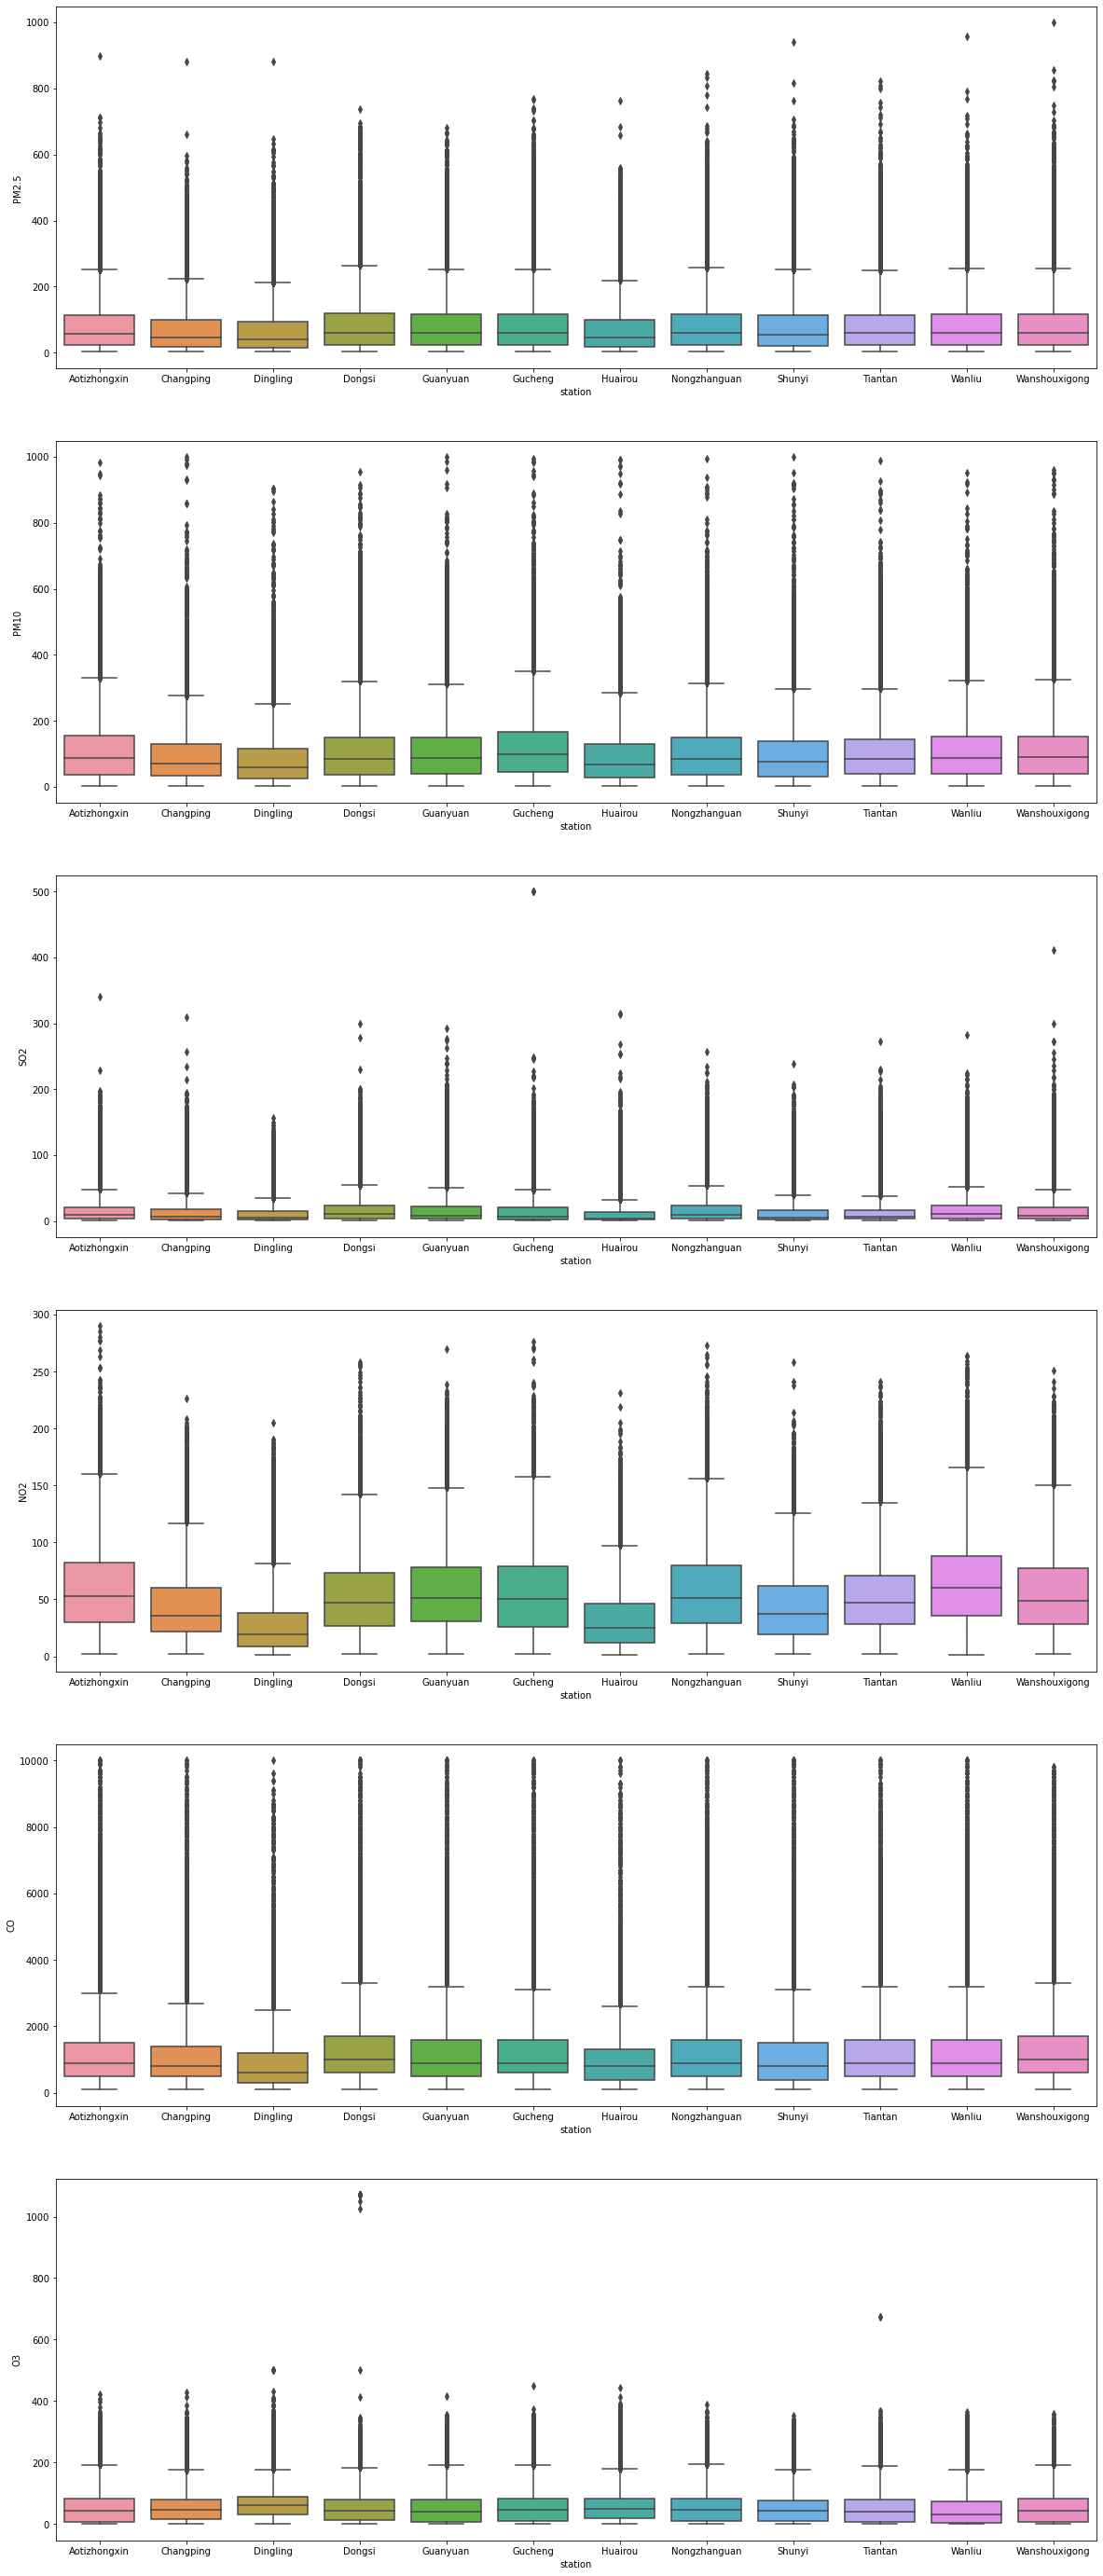

In [346]:
# Box plot-ovi koncentracija razlicitih polutanata po stanicama:

df_all=pd.concat([df_Aotizhongxin,df_Changping,df_Dingling,df_Dongsi,df_Guanyuan,df_Gucheng,df_Huairou,df_Nongzhanguan,df_Shunyi,df_Tiantan,df_Wanliu,df_Wanshouxigong],ignore_index=True)
figure=plt.figure(figsize=(20,50))
figure.add_subplot(6,1,1)
sns.boxplot(x='station',y='PM2.5',data=df_all)
figure.add_subplot(6,1,2)
sns.boxplot(x='station',y='PM10',data=df_all)
figure.add_subplot(6,1,3)
sns.boxplot(x='station',y='SO2',data=df_all)
figure.add_subplot(6,1,4)
sns.boxplot(x='station',y='NO2',data=df_all)
figure.add_subplot(6,1,5)
sns.boxplot(x='station',y='CO',data=df_all)
figure.add_subplot(6,1,6)
sns.boxplot(x='station',y='O3',data=df_all)
plt.show()

In [350]:
# Nazivi stanica:

stations=[]
for data in dataframes:
    stations.append(data['station'].iloc[0])
print(np.array(stations))

['Aotizhongxin' 'Changping' 'Dingling' 'Dongsi' 'Guanyuan' 'Gucheng'
 'Huairou' 'Nongzhanguan' 'Shunyi' 'Tiantan' 'Wanliu' 'Wanshouxigong']


In [351]:
# Velicina svake od baza podataka:

print("Shape svake od baza: \n" )
for data in dataframes:
    print("{}:{}".format(data['station'].iloc[0],data.shape))

Shape svake od baza: 

Aotizhongxin:(35064, 17)
Changping:(35064, 17)
Dingling:(35064, 17)
Dongsi:(35064, 17)
Guanyuan:(35064, 17)
Gucheng:(35064, 17)
Huairou:(35064, 17)
Nongzhanguan:(35064, 17)
Shunyi:(35064, 17)
Tiantan:(35064, 17)
Wanliu:(35064, 17)
Wanshouxigong:(35064, 17)


In [76]:
# Nedostajuce vrednosti:

print("Broj NA vrednosti po stanicama: \n")
for data in dataframes:
    print("{}:{}".format(data['station'].iloc[0],np.sum(np.sum(data.isna()))))

Broj NA vrednosti po stanicama: 

Aotizhongxin:7271
Changping:5166
Dingling:7015
Dongsi:7600
Guanyuan:5279
Gucheng:4728
Huairou:7485
Nongzhanguan:4090
Shunyi:8523
Tiantan:5277
Wanliu:6447
Wanshouxigong:5146


In [85]:
# Prosecna vrednost:

print("Prosecna vrednost PM2.5 po stanicama: \n")
PM25=[]
for data in dataframes:
    PM25.append(data['PM2.5'].mean())
    print("{}:{}".format(data['station'].iloc[0],data['PM2.5'].mean()))

Prosecna vrednost PM2.5 po stanicama: 

Aotizhongxin:82.77361082632768
Changping:71.09974336541265
Dingling:65.98949686451802
Dongsi:86.19429678848283
Guanyuan:82.93337203901532
Gucheng:83.85208902318554
Huairou:69.62636686112984
Nongzhanguan:84.83848298292484
Shunyi:79.49160200286961
Tiantan:82.16491115828659
Wanliu:83.37471599100398
Wanshouxigong:85.02413582402235


In [86]:
# Prosecna vrednost:

print("Prosecna vrednost PM10 po stanicama: \n")
PM10=[]
for data in dataframes:
    PM10.append(data['PM10'].mean())
    print("{}:{}".format(data['station'].iloc[0],data['PM10'].mean()))

Prosecna vrednost PM10 po stanicama: 

Aotizhongxin:110.06039131194318
Changping:94.65787077315701
Dingling:83.73972332015809
Dongsi:110.33674190837705
Guanyuan:109.02330301717915
Gucheng:118.86197849090333
Huairou:91.48269023244961
Nongzhanguan:108.99109577171902
Shunyi:98.7370263066404
Tiantan:106.36367249833174
Wanliu:110.46461759631974
Wanshouxigong:112.22345864661655


In [87]:
# Prosecna vrednost:

print("Prosecna vrednost O3 po stanicama: \n")
O3=[]
for data in dataframes:
    O3.append(data['O3'].mean())
    print("{}:{}".format(data['station'].iloc[0],data['O3'].mean()))

Prosecna vrednost O3 po stanicama: 

Aotizhongxin:56.3533584105563
Changping:57.940002617527554
Dingling:68.54837092466765
Dongsi:57.210636901162744
Guanyuan:55.795044283143014
Gucheng:57.69487883500799
Huairou:59.82471295373454
Nongzhanguan:58.5346822906418
Shunyi:55.20132076247207
Tiantan:55.984296589813226
Wanliu:48.87361389082739
Wanshouxigong:56.22990353675042


In [88]:
# Prosecna vrednost:

print("Prosecna vrednost CO po stanicama: \n")
CO=[]
for data in dataframes:
    CO.append(data['CO'].mean())
    print("{}:{}".format(data['station'].iloc[0],data['CO'].mean()))

Prosecna vrednost CO po stanicama: 

Aotizhongxin:1262.9451453977408
Changping:1152.3013445428255
Dingling:904.8960728548954
Dongsi:1330.0691310760349
Guanyuan:1271.294377232746
Gucheng:1323.9744229569558
Huairou:1022.5545449140955
Nongzhanguan:1324.3501978852855
Shunyi:1187.0639785927142
Tiantan:1298.303317814839
Wanliu:1319.3535125706724
Wanshouxigong:1370.3950306512274


In [89]:
# Prosecna vrednost:

print("Prosecna vrednost NO2 po stanicama: \n")
NO2=[]
for data in dataframes:
    NO2.append(data['NO2'].mean())
    print("{}:{}".format(data['station'].iloc[0],data['NO2'].mean()))

Prosecna vrednost NO2 po stanicama: 

Aotizhongxin:59.30583318645163
Changping:44.18208550745705
Dingling:27.585466754360024
Dongsi:53.699442802498275
Guanyuan:57.90164251707599
Gucheng:55.87107495348295
Huairou:32.49725021391175
Nongzhanguan:58.09717238740834
Shunyi:43.90886473782605
Tiantan:53.16264557400931
Wanliu:65.25878926575277
Wanshouxigong:55.529560136986305


In [96]:
# Prosecna vrednost:

print("Prosecna vrednost SO2 po stanicama: \n")
SO2=[]
for data in dataframes:
    SO2.append(data['SO2'].mean())
    print("{}:{}".format(data['station'].iloc[0],data['SO2'].mean()))

Prosecna vrednost SO2 po stanicama: 

Aotizhongxin:17.375901409358608
Changping:14.958905587176204
Dingling:11.749649653404786
Dongsi:18.53110660736606
Guanyuan:17.59094149754264
Gucheng:15.366161622826057
Huairou:12.121553010210071
Nongzhanguan:18.689242012825694
Shunyi:13.572038687514805
Tiantan:14.367615106345372
Wanliu:18.376480570616696
Wanshouxigong:17.148603110917286


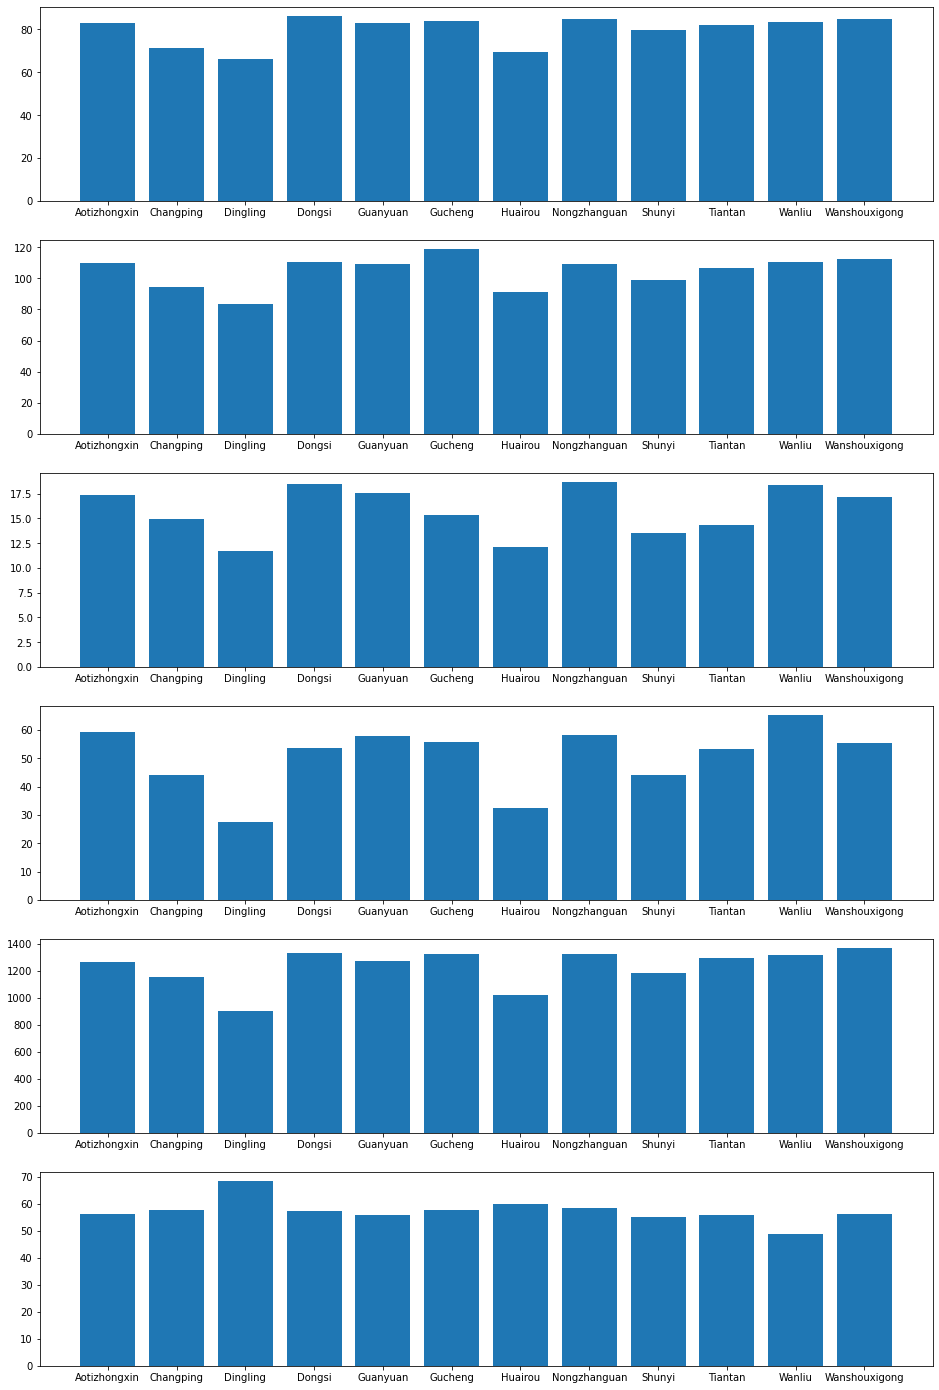

In [104]:
# Histogram prosecnih vrednosti svakog od polutanta po stanicama:

df_all=pd.concat([df_Aotizhongxin,df_Changping,df_Dingling,df_Dongsi,df_Guanyuan,df_Gucheng,df_Huairou,df_Nongzhanguan,df_Shunyi,df_Tiantan,df_Wanliu,df_Wanshouxigong],ignore_index=True)
figure=plt.figure(figsize=(16,25))
figure.add_subplot(6,1,1)
plt.bar(np.arange(len(PM25)),PM25)
plt.xticks(np.arange(len(stations)),stations)
figure.add_subplot(6,1,2)
plt.bar(np.arange(len(PM10)),PM10)
plt.xticks(np.arange(len(stations)),stations)
figure.add_subplot(6,1,3)
plt.bar(np.arange(len(SO2)),SO2)
plt.xticks(np.arange(len(stations)),stations)
figure.add_subplot(6,1,4)
plt.bar(np.arange(len(NO2)),NO2)
plt.xticks(np.arange(len(stations)),stations)
figure.add_subplot(6,1,5)
plt.bar(np.arange(len(CO)),CO)
plt.xticks(np.arange(len(stations)),stations)
figure.add_subplot(6,1,6)
plt.bar(np.arange(len(O3)),O3)
plt.xticks(np.arange(len(stations)),stations)
plt.show()

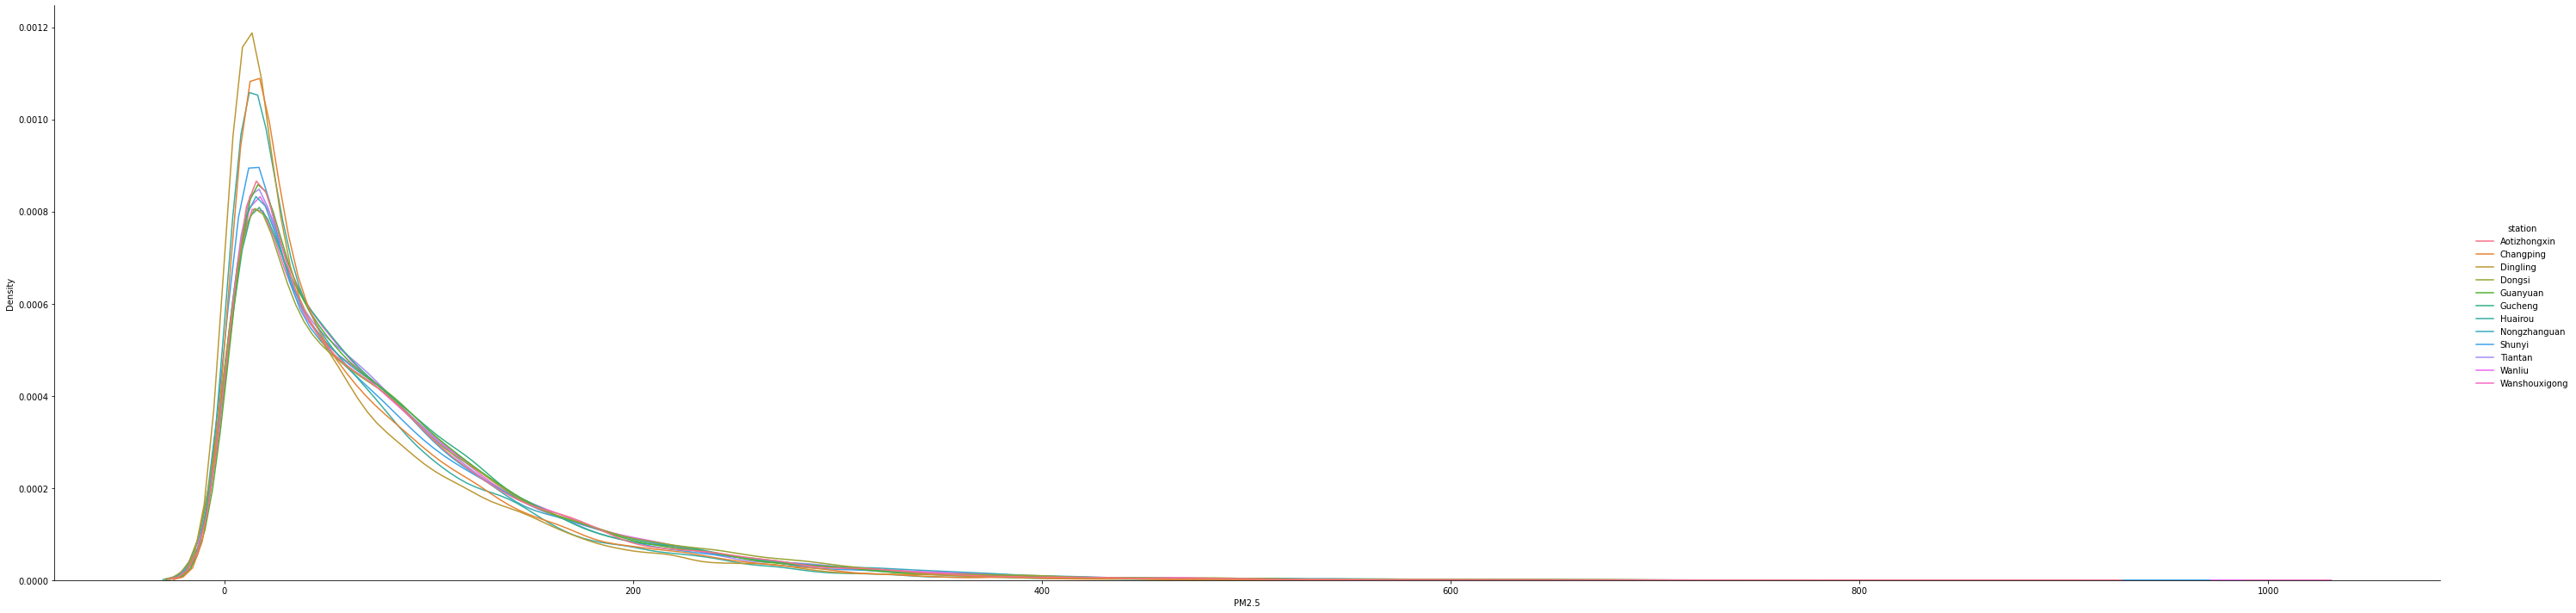

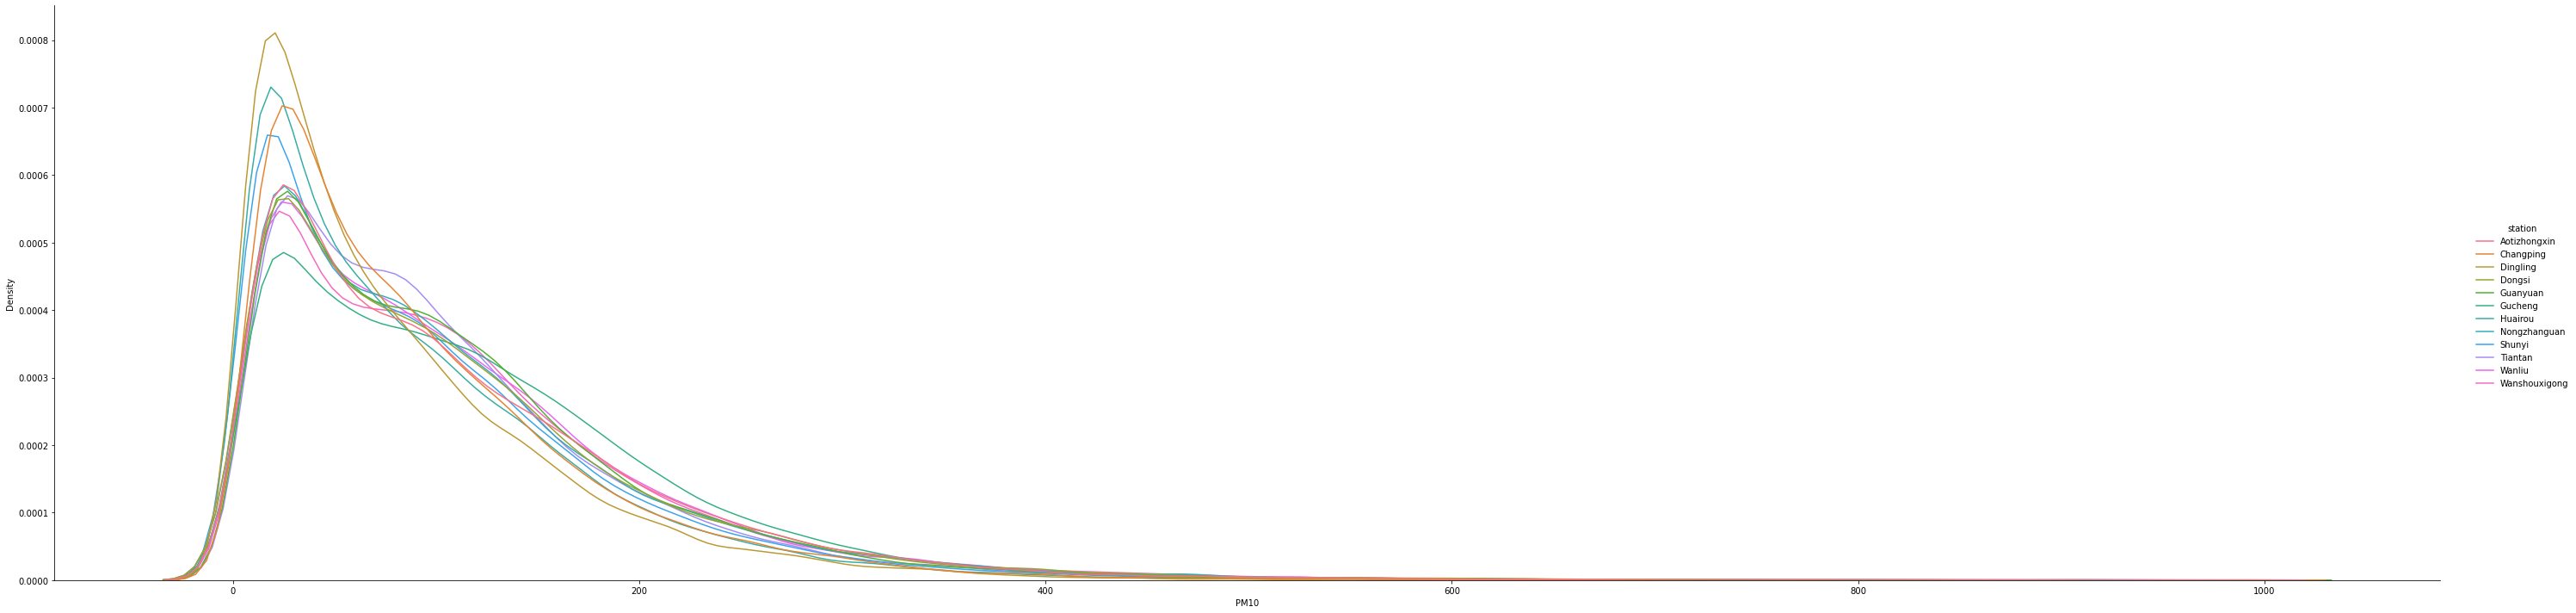

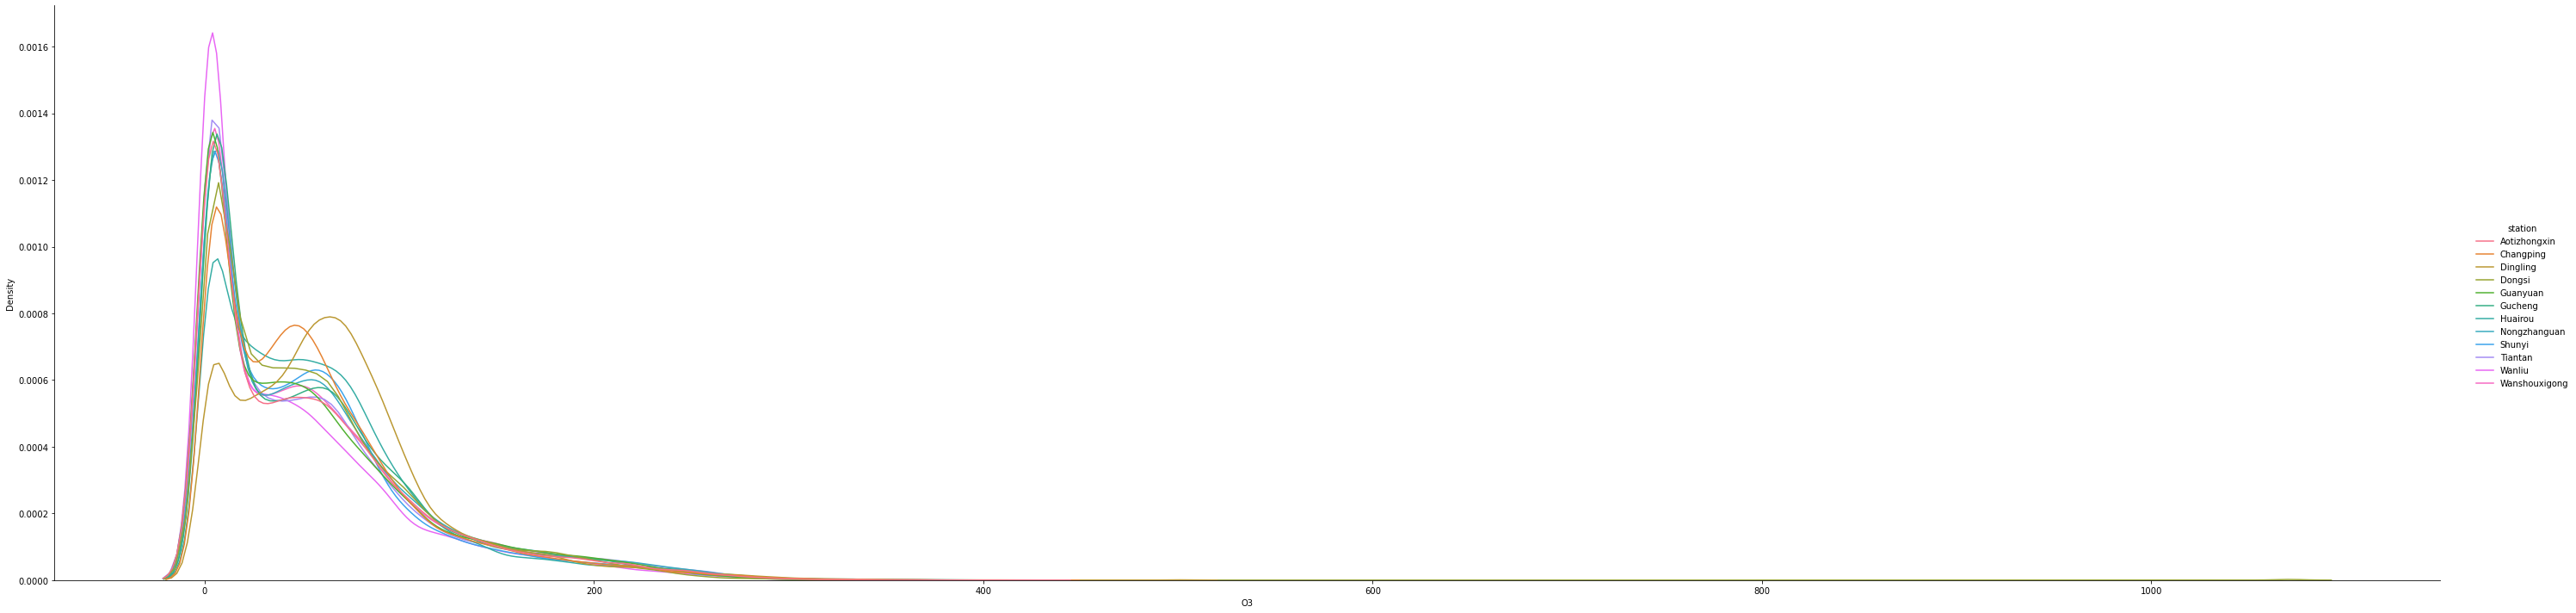

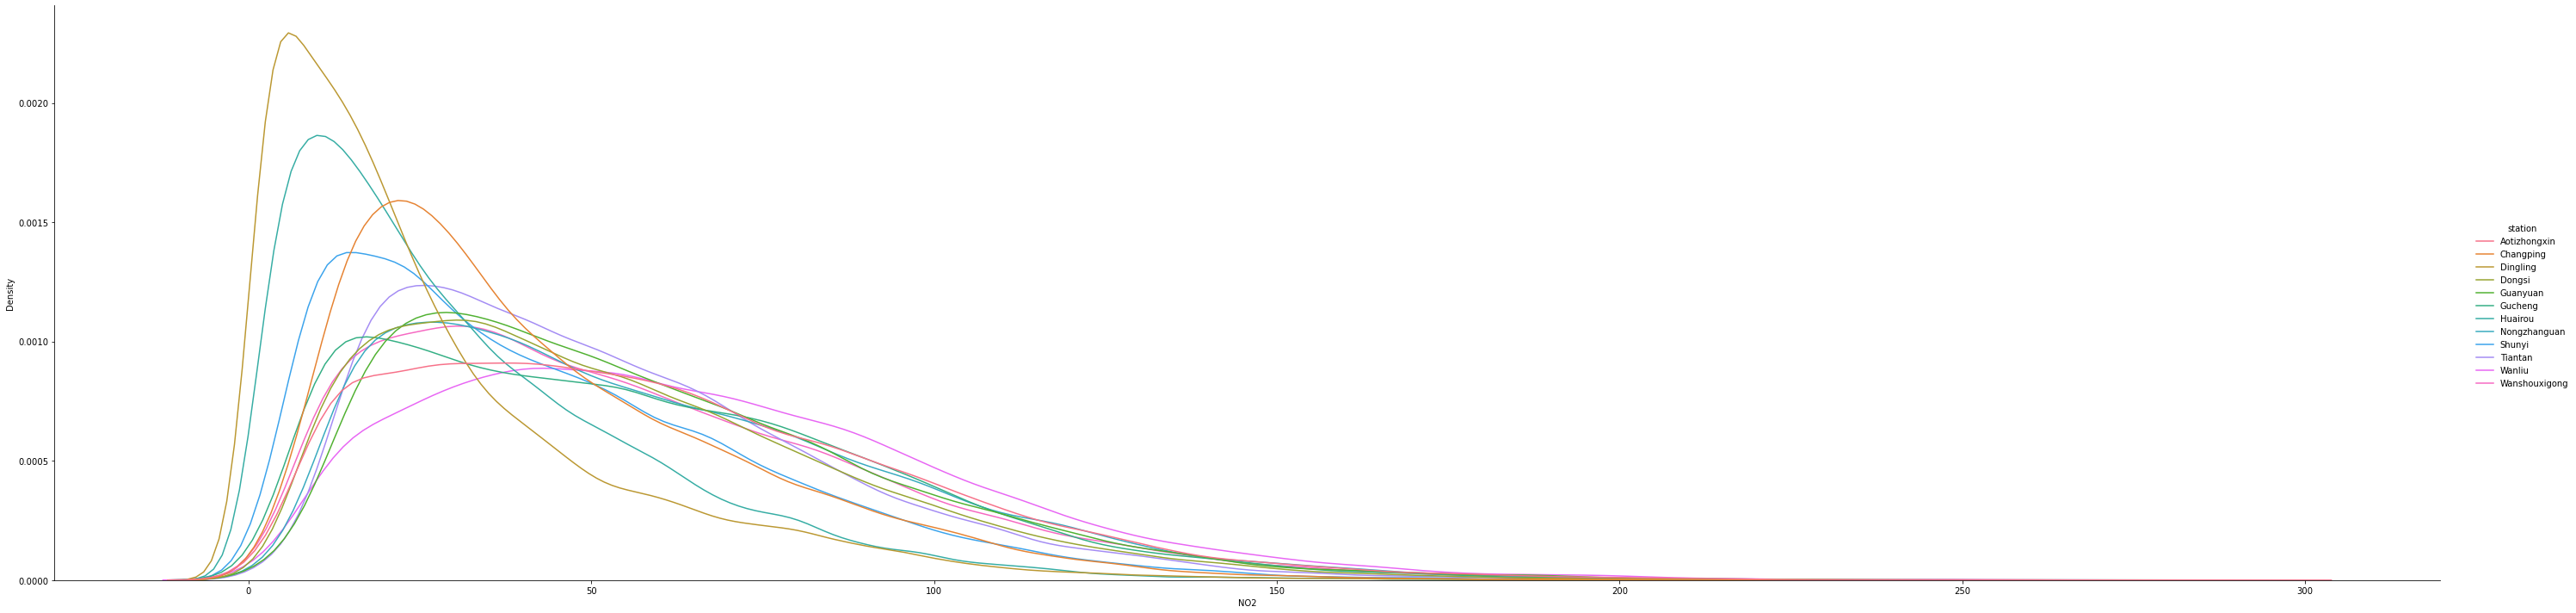

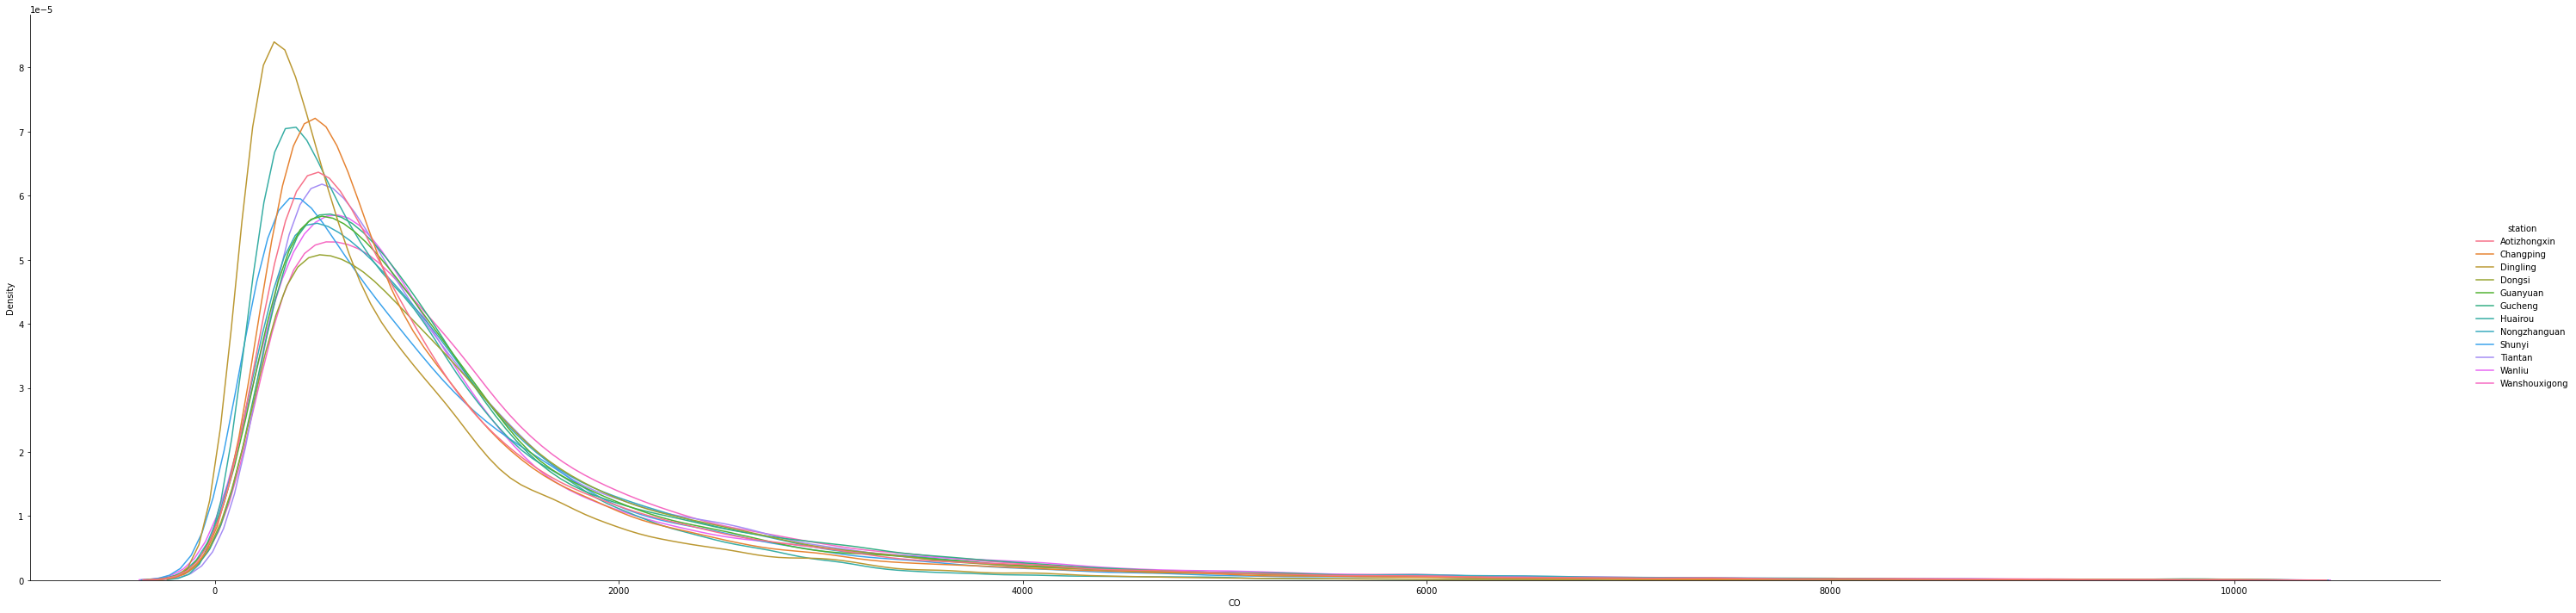

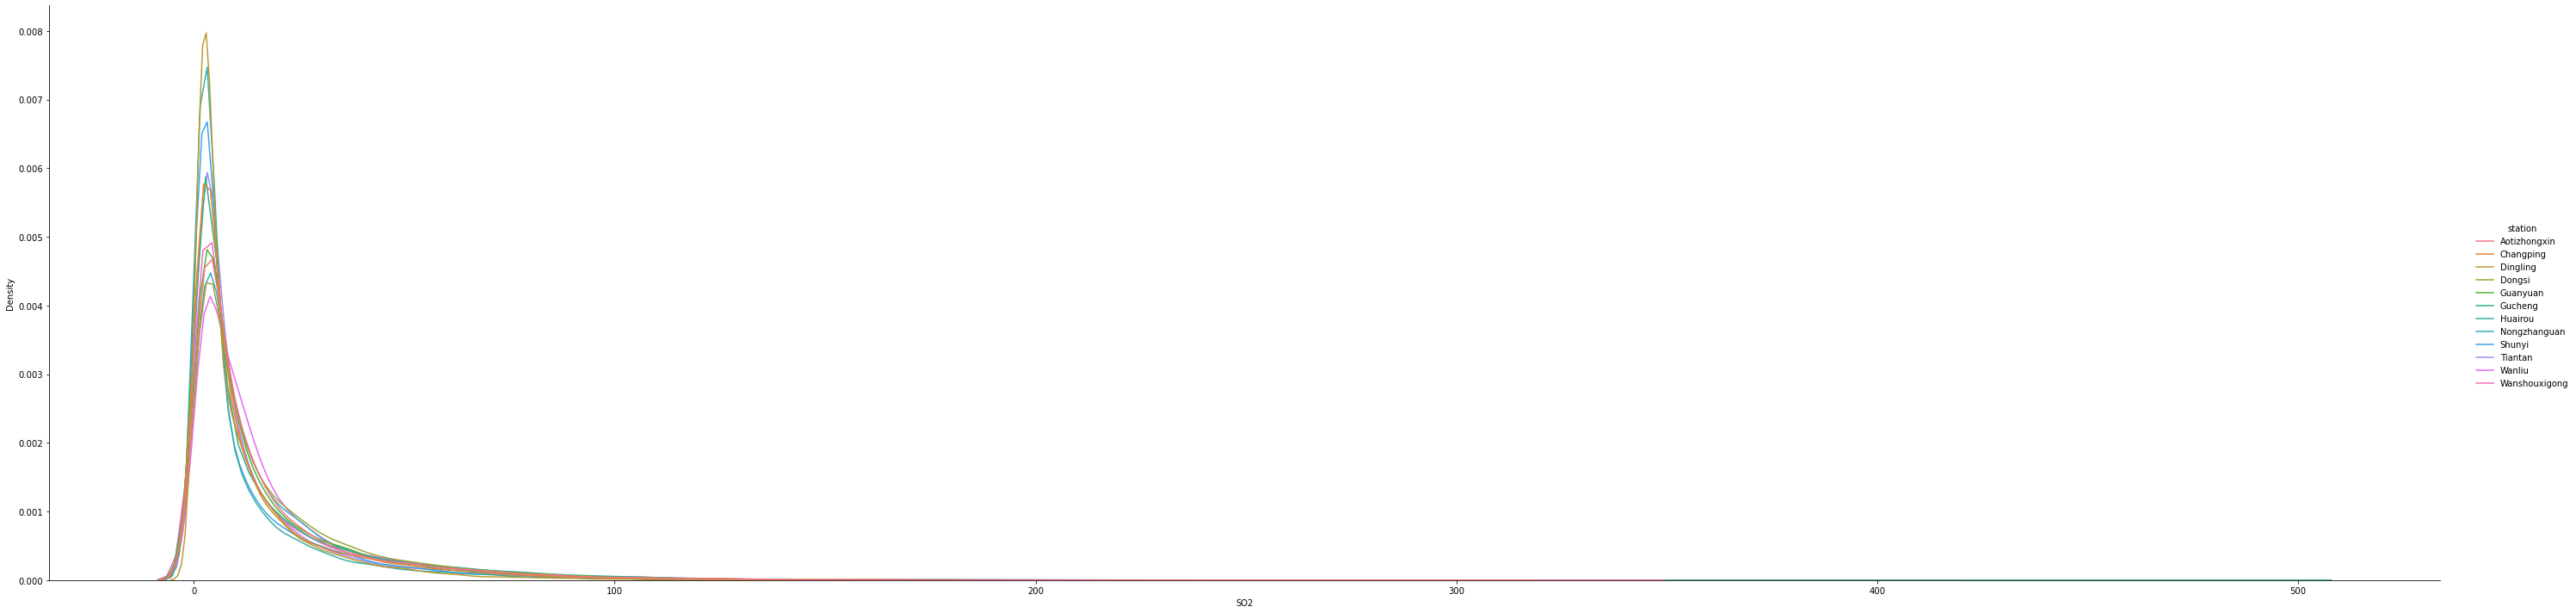

In [154]:
# Distribucija polutanata po stanicama:

dist=sns.displot(data=df_all,x='PM2.5',kind='kde',hue='station',  aspect=4,height=10)
dist=sns.displot(data=df_all,x='PM10',kind='kde',hue='station',  aspect=4,height=10)
dist=sns.displot(data=df_all,x='O3',kind='kde',hue='station',  aspect=4,height=10)
dist=sns.displot(data=df_all,x='NO2',kind='kde',hue='station',  aspect=4,height=10)
dist=sns.displot(data=df_all,x='CO',kind='kde',hue='station',  aspect=4,height=10)
dist=sns.displot(data=df_all,x='SO2',kind='kde',hue='station',  aspect=4,height=10)

In [155]:
# Izaberimo neku od stanica za koju cemo detaljnije istraziti bazu!

# Umesto random izbora neke od stanica, pronaci cemo stanicu sa najmanje NA vrednosti i nju istraziti!

from numpy import inf
df_station={1:df_Aotizhongxin,2:df_Changping,3:df_Dingling,4:df_Dongsi,5:df_Guanyuan,6:df_Gucheng,7:df_Huairou,8:df_Nongzhanguan,9:df_Shunyi,10:df_Tiantan,11:df_Wanliu,12:df_Wanshouxigong} # dictionary
def best_data(df_station): 
  min_average=inf
  best_station=''
  for i in range(1,len(df_station)):
    average=df_station[i].isnull().mean().mean()
    if average<min_average:
      best_station=df_station[i]['station'][1]
      min_average=average
  return(best_station)


In [157]:
# Stanica sa najmanje nedostajucih vrednosti:

best_data(df_station)

'Nongzhanguan'

In [159]:
df_Nongzhanguan.head(5)

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
No,,,,,,,,,,,,,,,,,
1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [161]:
df_Nongzhanguan.columns

Index(['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [162]:
df_Nongzhanguan.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,34436.000000,34624.000000,34618.000000,34372.000000,33858.000000,34558.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,2014.662560,6.522930,15.729637,11.500000,84.838483,108.991096,18.689242,58.097172,1324.350198,58.534682,13.671490,1012.547419,2.447535,0.064020,1.860785
std,1.177213,3.448752,8.800218,6.922285,86.225344,95.341177,24.280665,36.297740,1245.166124,58.401448,11.458418,10.266059,13.810696,0.786282,1.280368
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,23.000000,80.000000,1600.000000,84.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


In [172]:
# Broj nedostajucih vrednosti u kolonama year, month, day i hour:

df_Nongzhanguan[['year','month','day','hour']].isnull().sum()

year     0
month    0
day      0
hour     0
dtype: int64

In [173]:
# Kako kolone year, month, day i hour nemaju nedostajucih vrednosti mozemo formirati kolonu sa datumom.

# Nasa baza podataka sadrzi infomacije o vrednosti po satima => freq='H'

df_Nongzhanguan.head()
datetime_col = pd.date_range(start='2013-03-01 00:00:00', end='2017-02-28 23:00:00',freq='H')
df_Nongzhanguan.set_index(datetime_col, drop = True, inplace = True)

In [175]:
df_Nongzhanguan.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
2013-03-01 00:00:00,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
2013-03-01 01:00:00,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2013-03-01 02:00:00,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
2013-03-01 03:00:00,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
2013-03-01 04:00:00,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [176]:
col=['PM2.5','PM10','SO2','NO2','CO','O3']
df_Nongzhanguan=df_Nongzhanguan[col]

In [177]:
df_Nongzhanguan.head()

,PM2.5,PM10,SO2,NO2,CO,O3
2013-03-01 00:00:00,5.0,14.0,4.0,12.0,200.0,85.0
2013-03-01 01:00:00,8.0,12.0,6.0,14.0,200.0,84.0
2013-03-01 02:00:00,3.0,6.0,5.0,14.0,200.0,83.0
2013-03-01 03:00:00,5.0,5.0,5.0,14.0,200.0,84.0
2013-03-01 04:00:00,5.0,5.0,6.0,21.0,200.0,77.0


In [178]:
# Za svaki od polutanata postoje nedostajuce vrednosti!

df_Nongzhanguan.isnull().sum()

PM2.5     628
PM10      440
SO2       446
NO2       692
CO       1206
O3        506
dtype: int64

In [179]:
# Trenutno za dalje istrazivanje baze podataka, kao strategiju handlovanja nedostajucih vrednosti izabracemo 
# interpolaciju koriscenjem linearnog interpolacionog modela

df_Nongzhanguan=df_Nongzhanguan.interpolate()

In [180]:
# Nedostajuce vrednosti nakon interpolacije:

df_Nongzhanguan.isnull().sum()

PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
dtype: int64

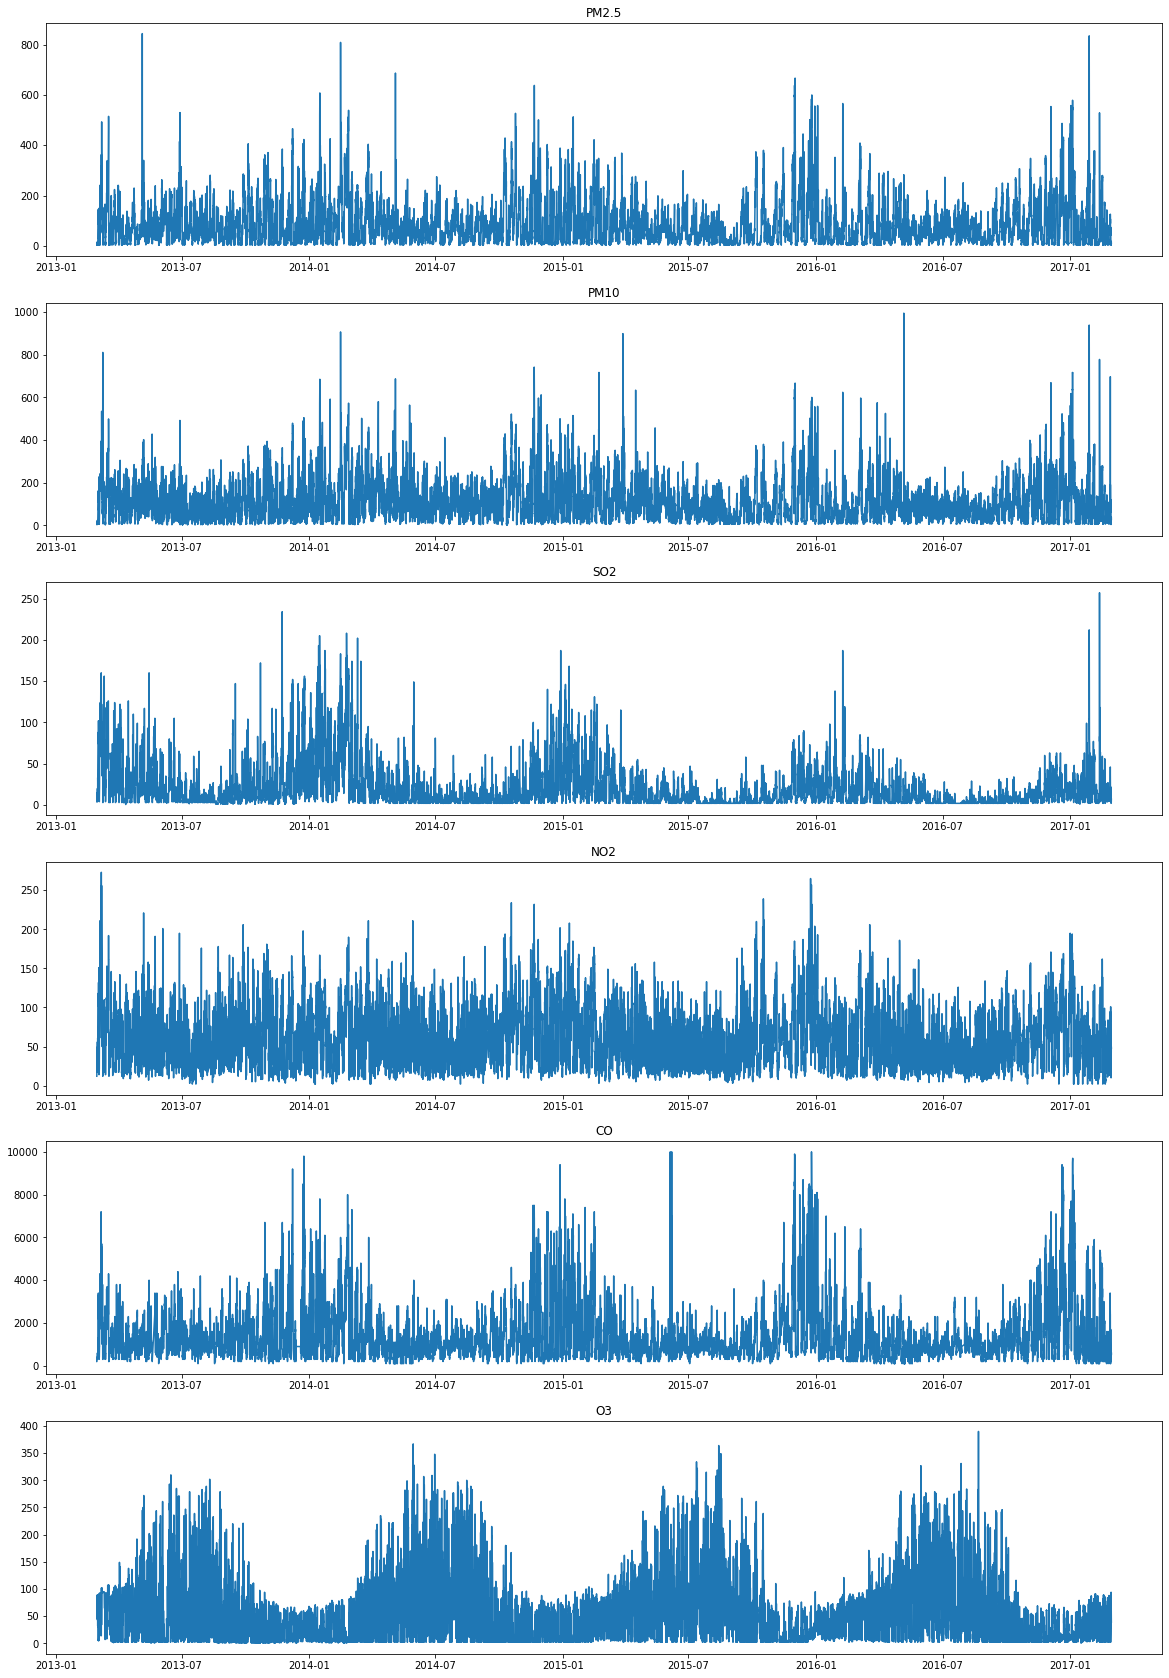

In [200]:
# Vremenske serije svakog od polutanata za stanicu Nongzhanguan, po satima, u periodu od 2013 do 2017 godine:

fig=plt.figure(figsize=(20,30))
for i,col in enumerate(df_Nongzhanguan.columns):
    fig.add_subplot(6,1,i+1)
    plt.plot(df_Nongzhanguan[col])
    plt.title(col)
plt.show()

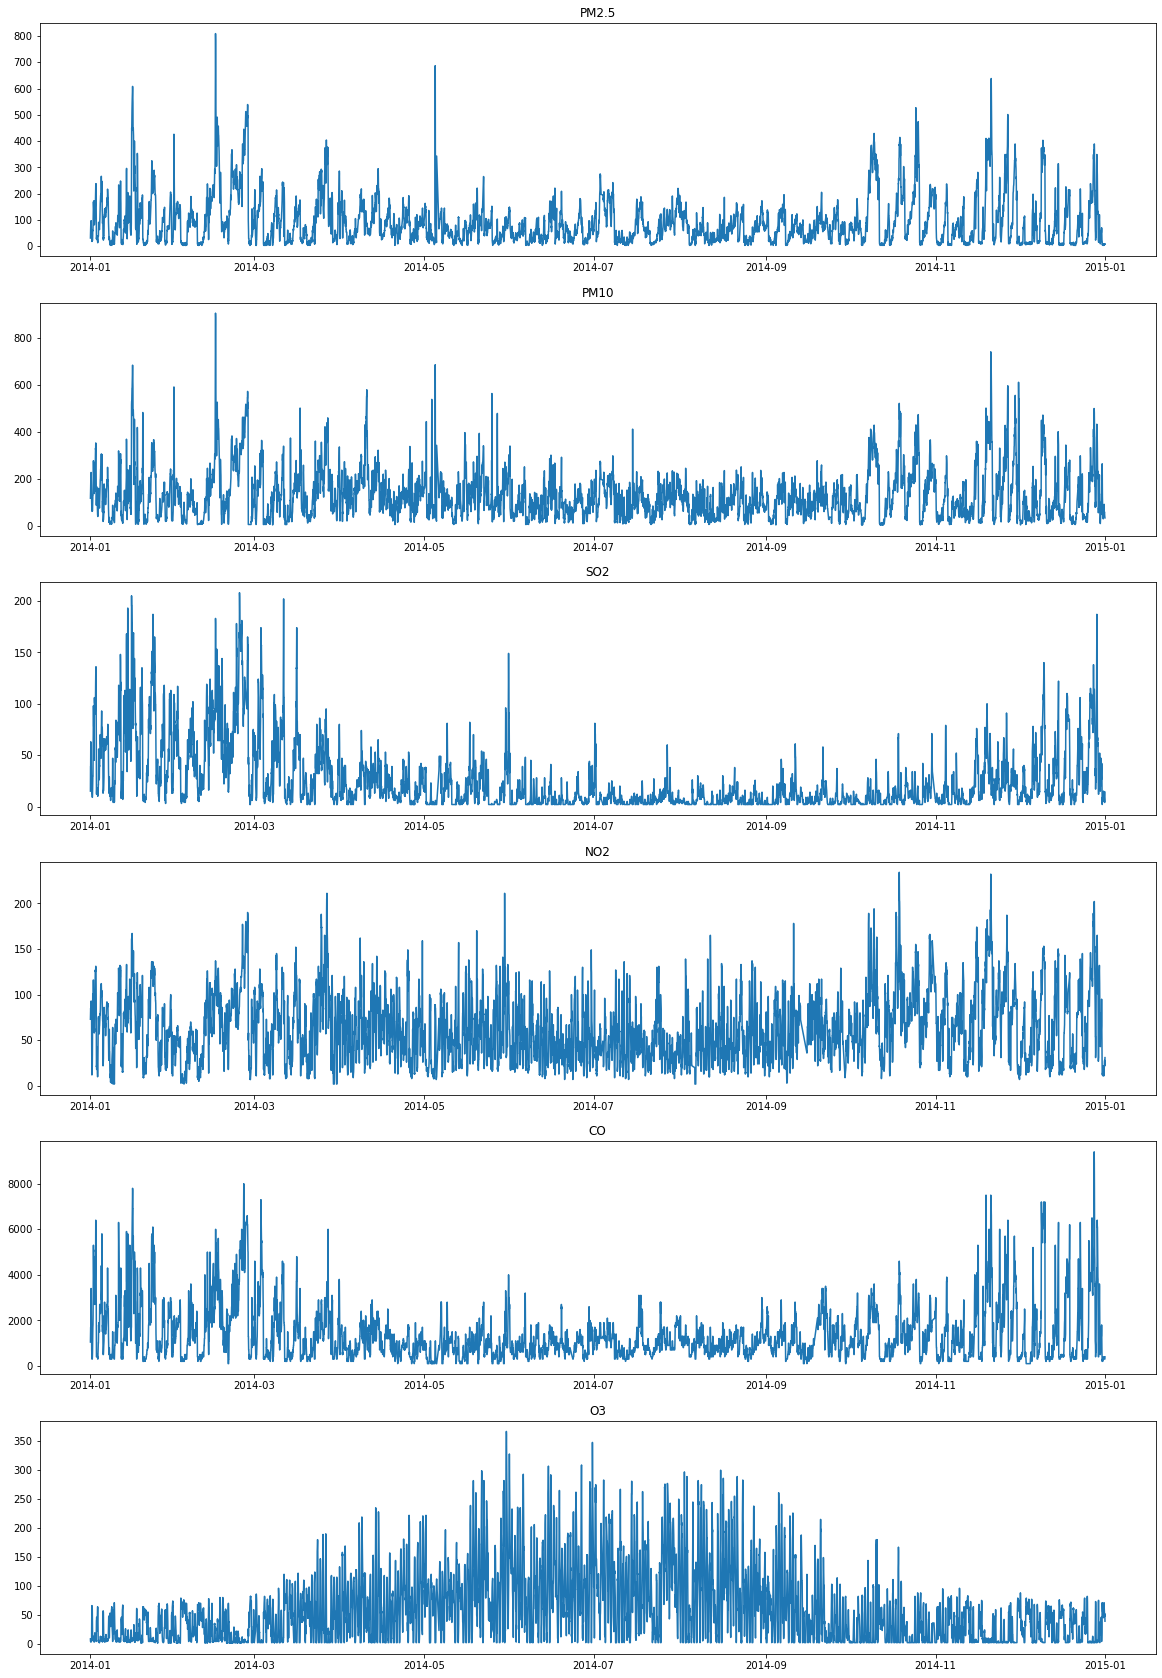

In [195]:
# Vremenske serije svakog od polutanata za stanicu Nongzhanguan, po satima, tokom jedne godine (2014):

fig=plt.figure(figsize=(20,30))
for i,col in enumerate(df_Nongzhanguan.columns):
    fig.add_subplot(6,1,i+1)
    plt.plot(df_Nongzhanguan[col].loc['2014-01-01 00:00:00':'2014-12-31 23:00:00'])
    plt.title(col)
plt.show()


In [202]:
# Dan sa najvecim izmerenim koncentracijama PM2.5 i PM10 u vazduhu na stanici Nongzhanguan u periodu od 2013 do 2017 godine:

df_Nongzhanguan['PM2.5'].loc['2014-01-01 00:00:00':'2014-12-31 23:00:00'].idxmax(),df_Nongzhanguan['PM10'].loc['2014-01-01 00:00:00':'2014-12-31 23:00:00'].idxmax()

(Timestamp('2014-02-15 00:00:00', freq='H'),
 Timestamp('2014-02-15 00:00:00', freq='H'))

In [205]:
# Zanimljivost:
# Upravo tog dana mediju u Pekingu su obavestavali javnost o enormnim koncentracijama polutanata u vazduhu
# zbog odredjenih fabrika:
# Naredne slike svedoce o tome!


<img src='https://www.ctvnews.ca/polopoly_fs/1.1699804.1577784045!/httpImage/image.jpg_gen/derivatives/landscape_1020/image.jpg'>
A woman wears a mask as she walks under smog in Beijing, China, Saturday, Feb. 15, 2014. (AP / Alexander F. Yuan)

<img src='https://media.gettyimages.com/photos/general-view-of-the-pollution-covered-beijing-cbd-on-february-25-2014-picture-id474805369?s=2048x2048'>

<AxesSubplot:>

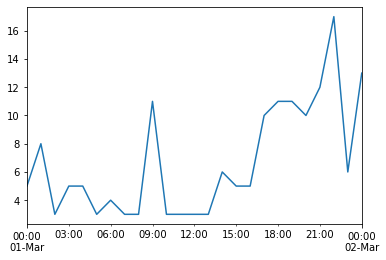

In [206]:
# Koncentracija polutanta PM2.5 u toku jednog dana
# Deluje da su najvece koncentracije zagadjenja oko 9 sati i nakon 5 sati.
# Mozemo razmisliti mozda o tome da li je to zagadjenje povezano sa prevozom s obzirom da su to sati kada ljudi 
# idu i vracaju se sa posla!

df_Nongzhanguan['PM2.5'][:25].plot()

In [207]:
# Resample baze podataka po danima ili mesecima:

def resample_data(dfs, freq = 'D'):

    if freq == 'D':
        return [each_df.resample(freq).mean() for each_df in dfs] 
    else:
        return [each_df.resample('D').mean().resample(freq).mean() for each_df in dfs]

In [208]:
df_PM25 = df_Nongzhanguan[['PM2.5']]
df_PM10 = df_Nongzhanguan[['PM10']]
df_SO2 = df_Nongzhanguan[['SO2']]
df_NO2 = df_Nongzhanguan[['NO2']]
df_CO = df_Nongzhanguan[['CO']]
df_O3 = df_Nongzhanguan[['O3']]

df_list = [df_PM25, df_PM10, df_SO2, df_NO2, df_CO, df_O3]
[dfd_PM25, dfd_PM10, dfd_SO2, dfd_NO2, dfd_CO, dfd_O3] = resample_data(df_list)
[dfm_PM25, dfm_PM10, dfm_SO2, dfm_NO2, dfm_CO, dfm_O3] = resample_data(df_list, freq = 'MS')
dfd_list = [dfd_PM25, dfd_PM10, dfd_SO2, dfd_NO2, dfd_CO, dfd_O3]
dfm_list = [dfm_PM25, dfm_PM10, dfm_SO2, dfm_NO2, dfm_CO, dfm_O3]

In [209]:
# Baza podataka po danima:

dfd_PM25.head()

,PM2.5
2013-03-01,6.458333
2013-03-02,28.750000
2013-03-03,104.750000
2013-03-04,22.875000
2013-03-05,131.833333


In [210]:
# Baza podataka po satima:

dfm_PM25.head()

,PM2.5
2013-03-01,106.770161
2013-04-01,57.350000
2013-05-01,77.247312
2013-06-01,108.320139
2013-07-01,75.435484


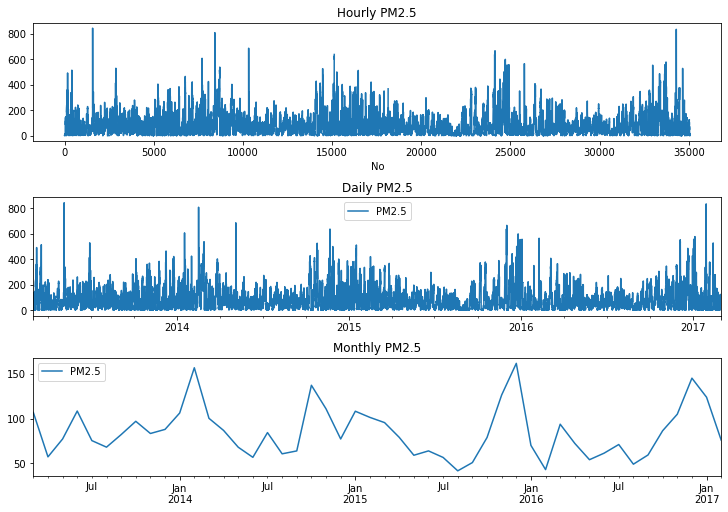

In [352]:
# Koncentracije polutanta PM2.5 po satima, danima i mesecima

fig, axes = plt.subplots(nrows = 3, ncols = 1, constrained_layout = True)
df_Nongzhanguan['PM2.5'].plot(figsize=(10,7), title = 'Hourly PM2.5', ax = axes[0])
df_PM25.plot(figsize=(10,7), title = 'Daily PM2.5',ax = axes[1])
dfm_PM25.plot(figsize=(10,7), title = 'Monthly PM2.5',ax= axes[2])
plt.show()

In [213]:
# Stacionarnost vremenskih serija:

In [214]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = np.format_float_positional(np.float16(value), unique=False, precision=4)
    print (dfoutput)

In [215]:
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = np.format_float_positional(np.float16(value), unique=False, precision=4)
    print (kpss_output)

In [216]:
# Stacionarnost za koncetraciju polutanata po danima:

for each_df in dfd_list:        
    print('\n', each_df.columns.values[0],'\n')
    # ADF
    adf_test(each_df.values[:,0])
    print()
    # KPSS
    kpss_test(each_df.values[:,0])


 PM2.5 

Results of Dickey-Fuller Test:
Test Statistic                -17.460936
p-value                              0.0
#Lags Used                           2.0
Number of Observations Used       1458.0
Critical Value (1%)              -3.4355
Critical Value (5%)              -2.8633
Critical Value (10%)             -2.5684
dtype: object

Results of KPSS Test:
Test Statistic           0.111263
p-value                       0.1
Lags Used                    24.0
Critical Value (10%)       0.3469
Critical Value (5%)        0.4629
Critical Value (2.5%)      0.5742
Critical Value (1%)        0.7388
dtype: object

 PM10 

Results of Dickey-Fuller Test:
Test Statistic                -8.941216
p-value                             0.0
#Lags Used                          9.0
Number of Observations Used      1451.0
Critical Value (1%)             -3.4355
Critical Value (5%)             -2.8633
Critical Value (10%)            -2.5684
dtype: object

Results of KPSS Test:
Test Statistic           0

C:\Users\kristina\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\kristina\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\kristina\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the ne

Test Statistic           1.084524
p-value                      0.01
Lags Used                    24.0
Critical Value (10%)       0.3469
Critical Value (5%)        0.4629
Critical Value (2.5%)      0.5742
Critical Value (1%)        0.7388
dtype: object

 NO2 

Results of Dickey-Fuller Test:
Test Statistic                -6.161227
p-value                             0.0
#Lags Used                         12.0
Number of Observations Used      1448.0
Critical Value (1%)             -3.4355
Critical Value (5%)             -2.8633
Critical Value (10%)            -2.5684
dtype: object

Results of KPSS Test:
Test Statistic           0.226807
p-value                       0.1
Lags Used                    24.0
Critical Value (10%)       0.3469
Critical Value (5%)        0.4629
Critical Value (2.5%)      0.5742
Critical Value (1%)        0.7388
dtype: object

 CO 

Results of Dickey-Fuller Test:
Test Statistic                -5.825878
p-value                             0.0
#Lags Used            

C:\Users\kristina\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\kristina\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\kristina\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.war

In [217]:
# Stacionarnost za koncentracije polutanata po mesecima:

for each_df in dfm_list:           
    print('\n', each_df.columns.values[0],'\n')
    # ADF
    adf_test(each_df.values[:,0])
    print()
    # KPSS
    kpss_test(each_df.values[:,0])


 PM2.5 

Results of Dickey-Fuller Test:
Test Statistic                -4.125313
p-value                        0.000879
#Lags Used                          5.0
Number of Observations Used        42.0
Critical Value (1%)             -3.5957
Critical Value (5%)             -2.9336
Critical Value (10%)            -2.6055
dtype: object

Results of KPSS Test:
Test Statistic           0.177408
p-value                       0.1
Lags Used                    10.0
Critical Value (10%)       0.3469
Critical Value (5%)        0.4629
Critical Value (2.5%)      0.5742
Critical Value (1%)        0.7388
dtype: object

 PM10 

Results of Dickey-Fuller Test:
Test Statistic                -4.265997
p-value                        0.000508
#Lags Used                          1.0
Number of Observations Used        46.0
Critical Value (1%)             -3.5820
Critical Value (5%)             -2.9277
Critical Value (10%)            -2.6016
dtype: object

Results of KPSS Test:
Test Statistic           0.175598

C:\Users\kristina\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\kristina\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\kristina\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the ne

In [ ]:
# Zapazanje: 
# Kod svih vremenskih serija polutanata, osim ozona, odbacuje se nulta hipoteza Augmented Dickey Fuller testa tj. serija poseduje jedinicne korene. O
# Osim sumpor dioksida, kod svih vremenskih serija polutanata prihvata se nulta hipoteza Kwiatkowski-Phillips-Schmidt-Shin testa tj. serija je stacionirana.

In [316]:
df_Nongzhanguan =dataframes[7].copy()
df_Nongzhanguan['month']=[dt.datetime.strptime("{}".format(x),'%m').strftime("%b") for x in df_Nongzhanguan['month']]
df_Nongzhanguan.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
No,,,,,,,,,,,,,,,,,
1,2013,Mar,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
2,2013,Mar,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
3,2013,Mar,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
4,2013,Mar,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
5,2013,Mar,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


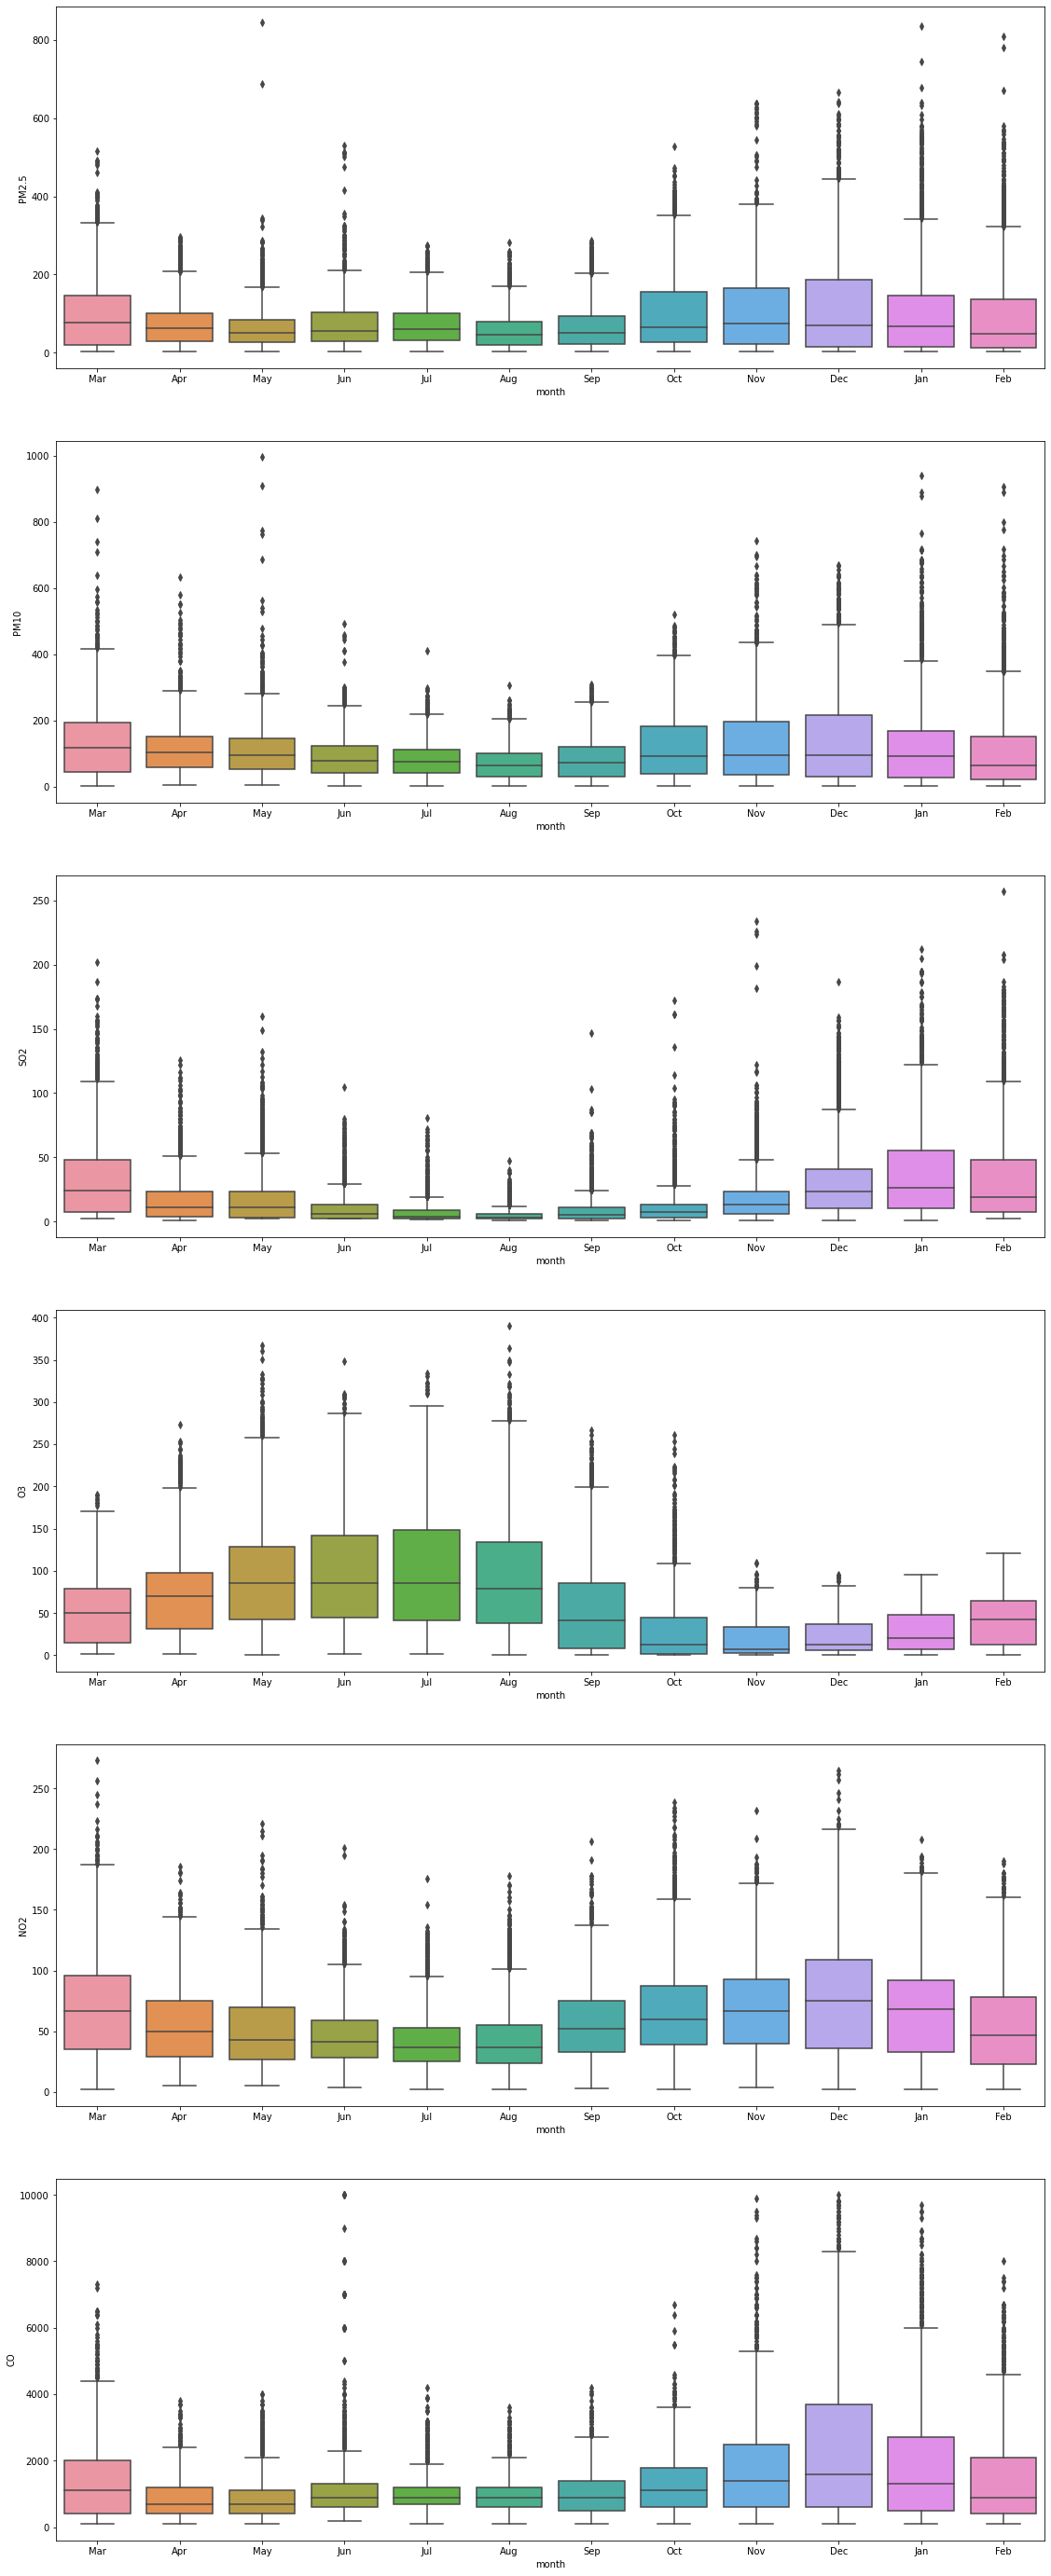

In [275]:
# Box plot koncentracije razlicitih polutanata u odnosu na mesece za stanicu Nongzhanguan:

polutants=['PM2.5','PM10','SO2','O3','NO2','CO']
figure=plt.figure(figsize=(19,50))
for i,polutant in enumerate(polutants):
     figure.add_subplot(6,1,i+1)
     sns.boxplot(x='month',y=polutant,data=df_Nongzhanguan)
plt.show()

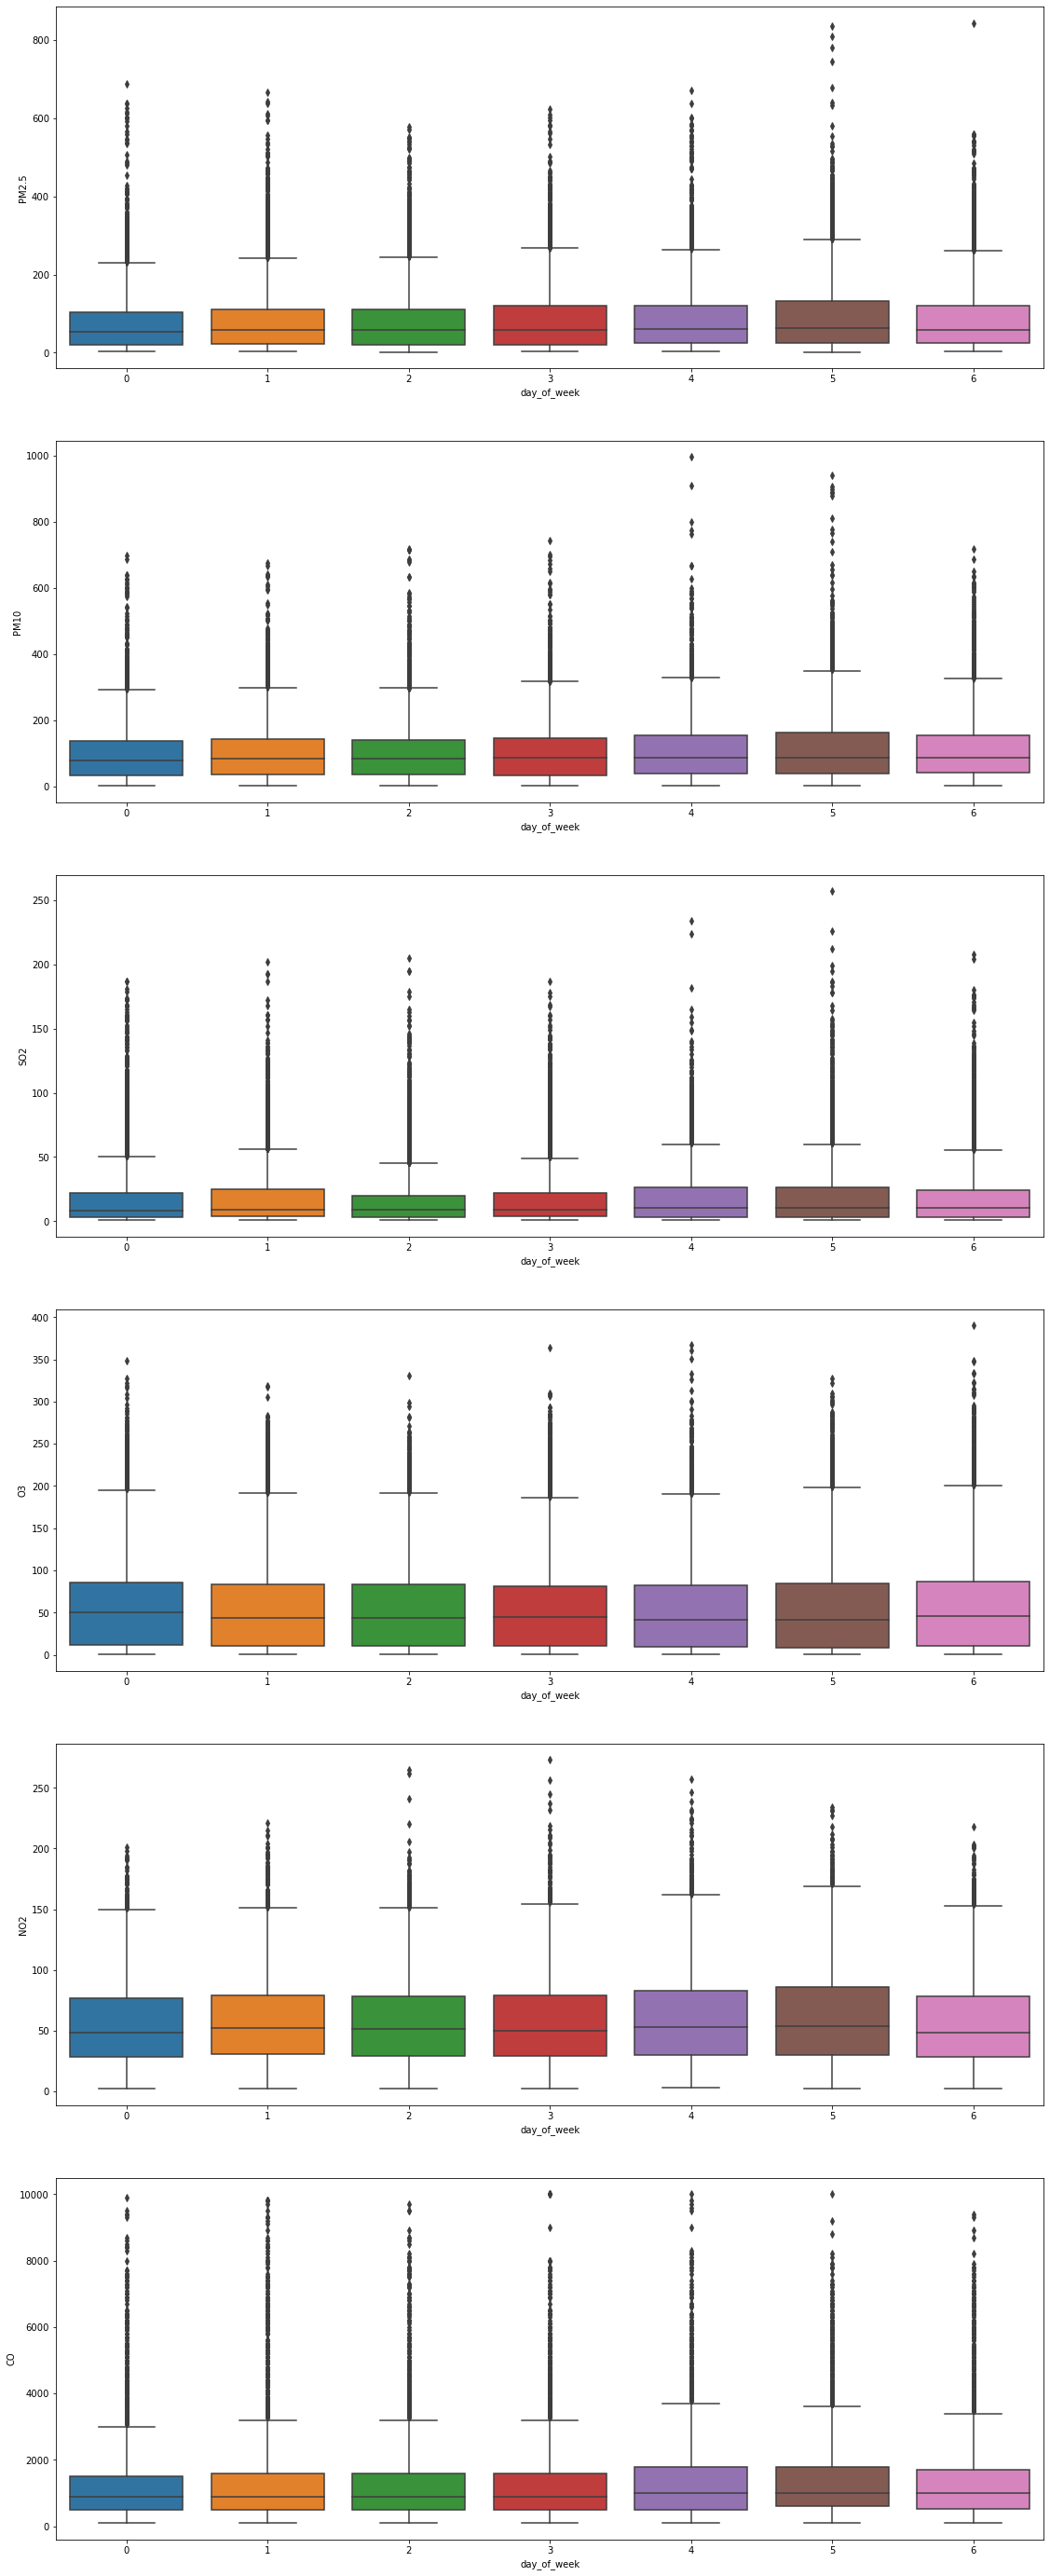

In [278]:
# Box plot koncentracije razlicitih polutanata u odnosu na dane u nedelji za stanicu Nongzhanguan:

datetime_col = pd.date_range(start='2013-03-01 00:00:00', end='2017-02-28 23:00:00',freq='H')
df_Nongzhanguan['date']=datetime_col
df_Nongzhanguan['day_of_week'] = df_Nongzhanguan['date'].dt.dayofweek 
figure=plt.figure(figsize=(19,50))
for i,polutant in enumerate(polutants):
     figure.add_subplot(6,1,i+1)
     sns.boxplot(x='day_of_week',y=polutant,data=df_Nongzhanguan)
plt.show()

In [312]:
# S obzirom na strukturu i orjentaciju terena u Pekingu (planine na severu i industrijska zona na jugu)
# vetrovi sa severa nose zagadjivace dalje od grada, dok juzni vetrovi nose zagadjivace prema gradu, gde su zatim
# zarobljeni planinama. 

# Pogledajmo boxplotove i vidimo da li se slazu sa ovom konstatacijom!

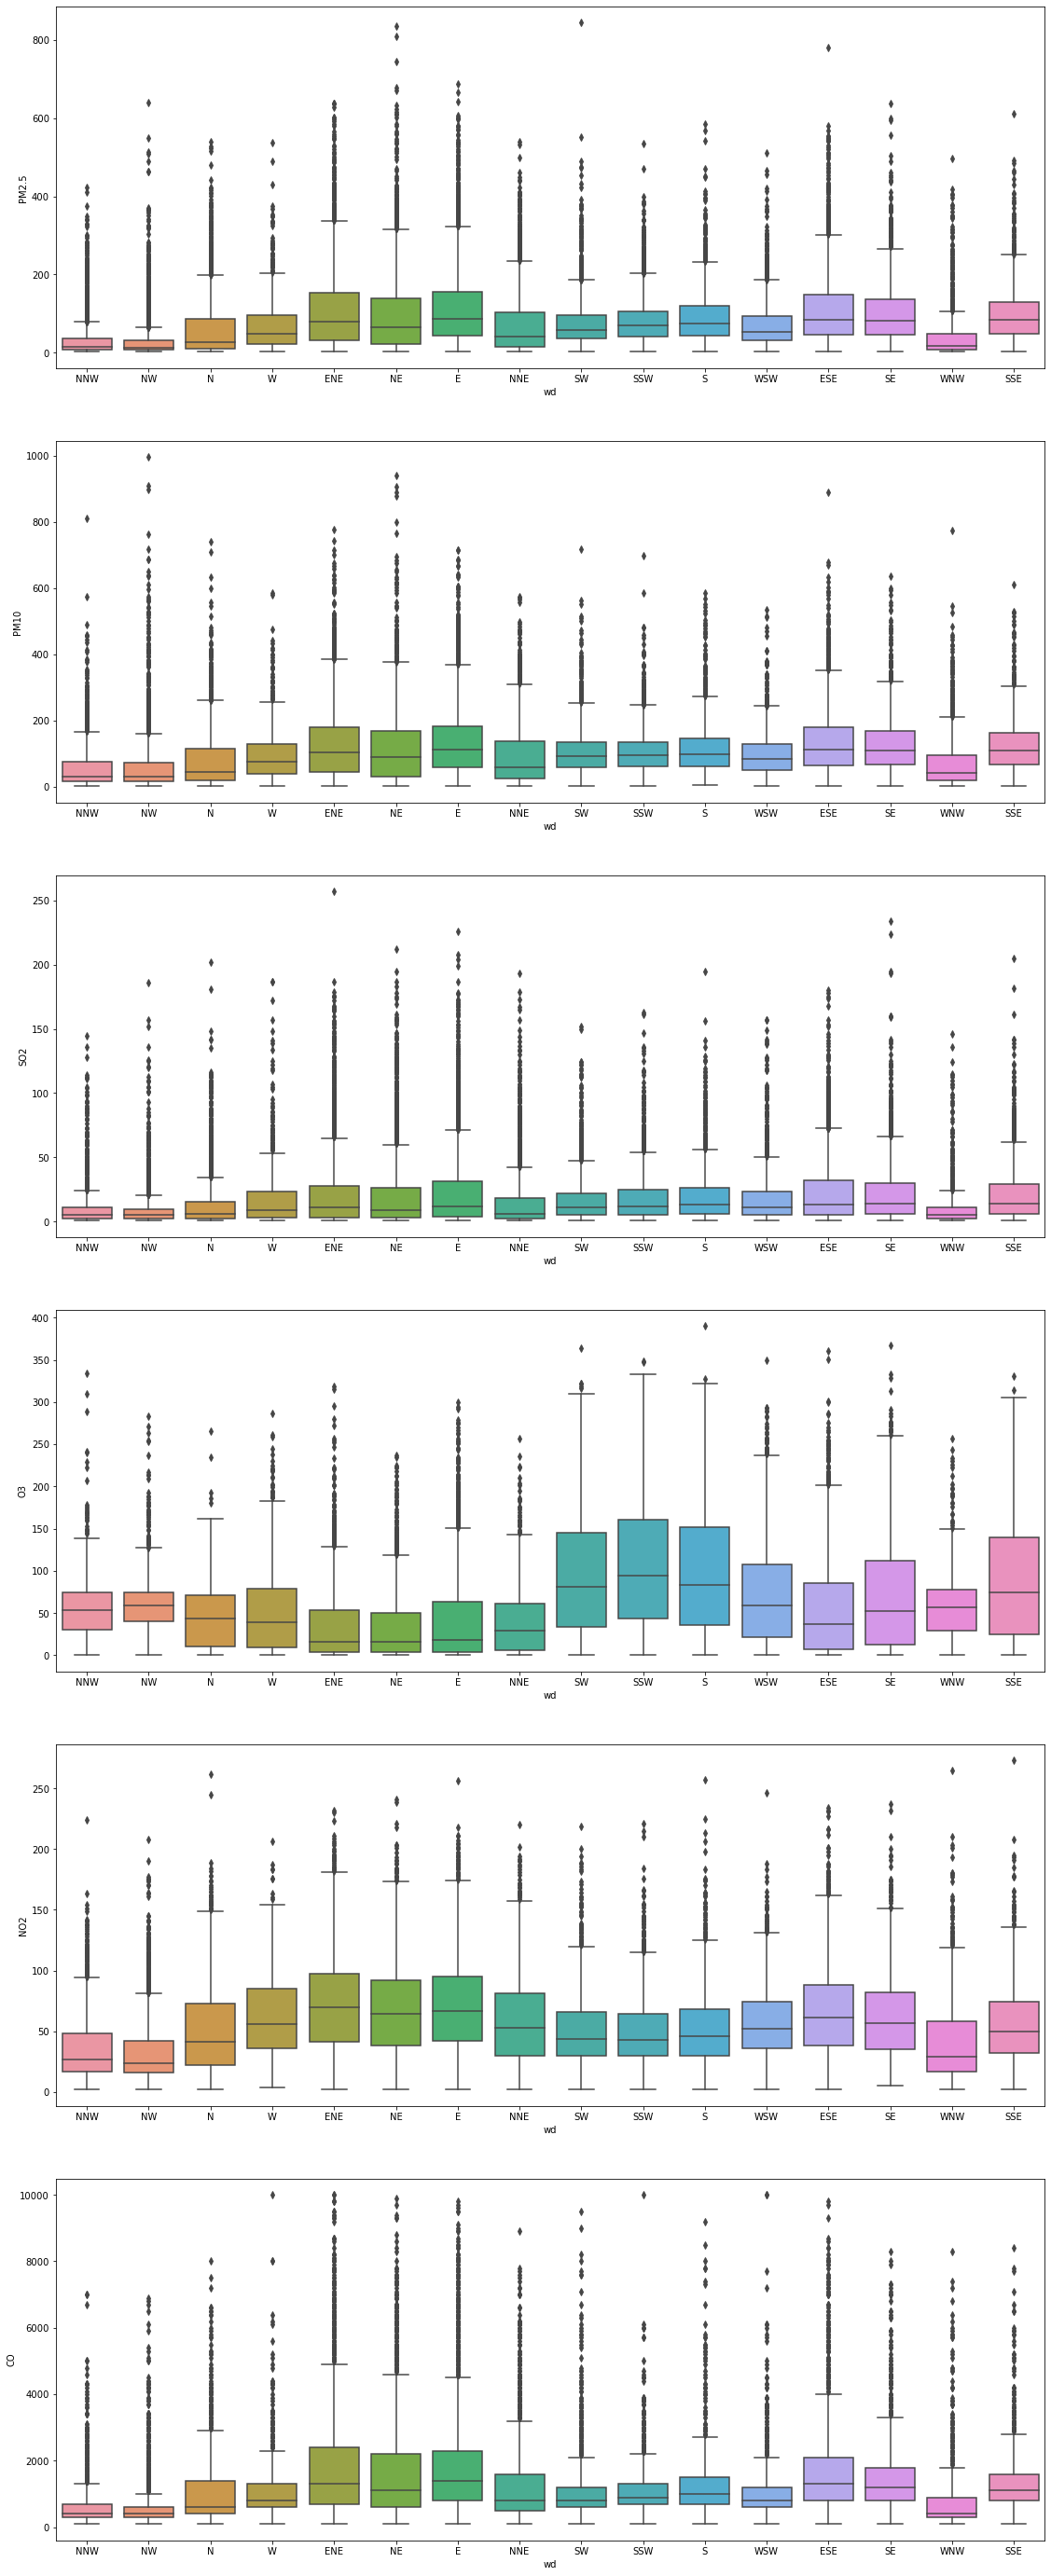

In [279]:
# Boxplot koncentracije polutanata u odnosu na pravac vetra za stanicu Nongzhanguan:

figure=plt.figure(figsize=(19,50))
for i,polutant in enumerate(polutants):
     figure.add_subplot(6,1,i+1)
     sns.boxplot(x='wd',y=polutant,data=df_Nongzhanguan)
plt.show()

In [317]:
# Podela kolone vetar samo u dve klase - Severni i Juzni

df_Nongzhanguan['wd']= df_Nongzhanguan['wd'].replace(['NNW','NW','N','ENE','NE','NNE','WNW','W'],'Severni')
df_Nongzhanguan['wd']= df_Nongzhanguan['wd'].replace(['SW','SSW','S','WSW','ESE','SE','SSE','E'],'Juzni')

In [318]:
df_Nongzhanguan.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
No,,,,,,,,,,,,,,,,,
1,2013,Mar,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,Severni,5.7,Nongzhanguan
2,2013,Mar,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,Severni,3.9,Nongzhanguan
3,2013,Mar,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,Severni,5.3,Nongzhanguan
4,2013,Mar,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,Severni,4.9,Nongzhanguan
5,2013,Mar,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,Severni,3.2,Nongzhanguan


In [319]:
# Kolona brzina vetra: Jak vetar => WSPM > 4 i Slab vetar <= WSPM <4
df_Nongzhanguan['Jacina vetra']=[ 'Jak' if x>4 else 'Slab' for x in df_Nongzhanguan['WSPM']]

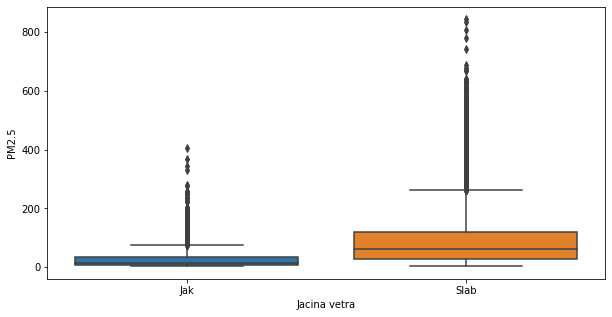

In [320]:
# Box plot koncentracije polutanata u odnosu na jacinu vetra za stanicu df_Nongzhanguan:

plt.figure(figsize=(10,5))
sns.boxplot(x='Jacina vetra',y='PM2.5',data=df_Nongzhanguan)
plt.show()

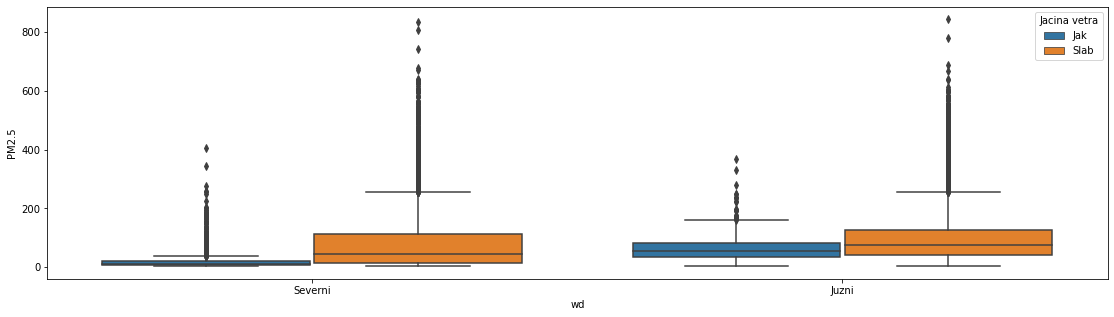

In [323]:
# Box plot koncentracije polutanata u odnosu na jacinu vetra i pravac SEVER-JUG za stanicu df_Nongzhanguan:

plt.figure(figsize=(19,5))
sns.boxplot(x='wd',y='PM2.5',data=df_Nongzhanguan,hue='Jacina vetra')
plt.show()

In [ ]:
# Višegodišnja ispitivanja kvaliteta vazduha pokazuju da su koncentracije čađi i suspendovanih čestica koje se emituju prilikom sagorevanja uglja, 
# drva i ostalog ogreva uobičajno povećane tokom sezone loženja. 
# Oblačnost bez padavina sa niskom temeraturom bez vetra, karakteristična za ovaj period godine, dovodi do nagomilavanja ovih zagađujućih materija.
# Ispitajmo prethodno!

In [325]:
df_Nongzhanguan =dataframes[7].copy()
df_Nongzhanguan['heating']=df_Nongzhanguan['month']
df_Nongzhanguan['heating']=df_Nongzhanguan['heating'].replace([10,11,12,1,2,3],'YES')
df_Nongzhanguan['heating']=df_Nongzhanguan['heating'].replace([4,5,6,7,8,9],'NO')

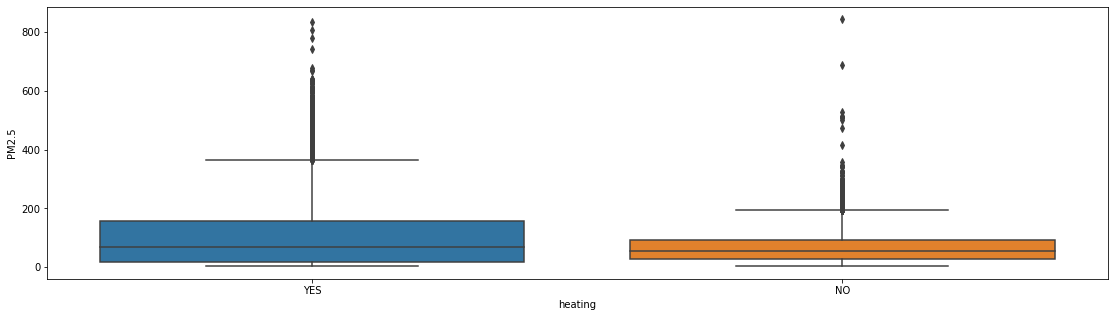

In [327]:
plt.figure(figsize=(19,5))
sns.boxplot(x='heating',y='PM2.5',data=df_Nongzhanguan)
plt.show()

# Tokom grejne sezone koncentracije polutanata u vazduhu su definitivno vece!

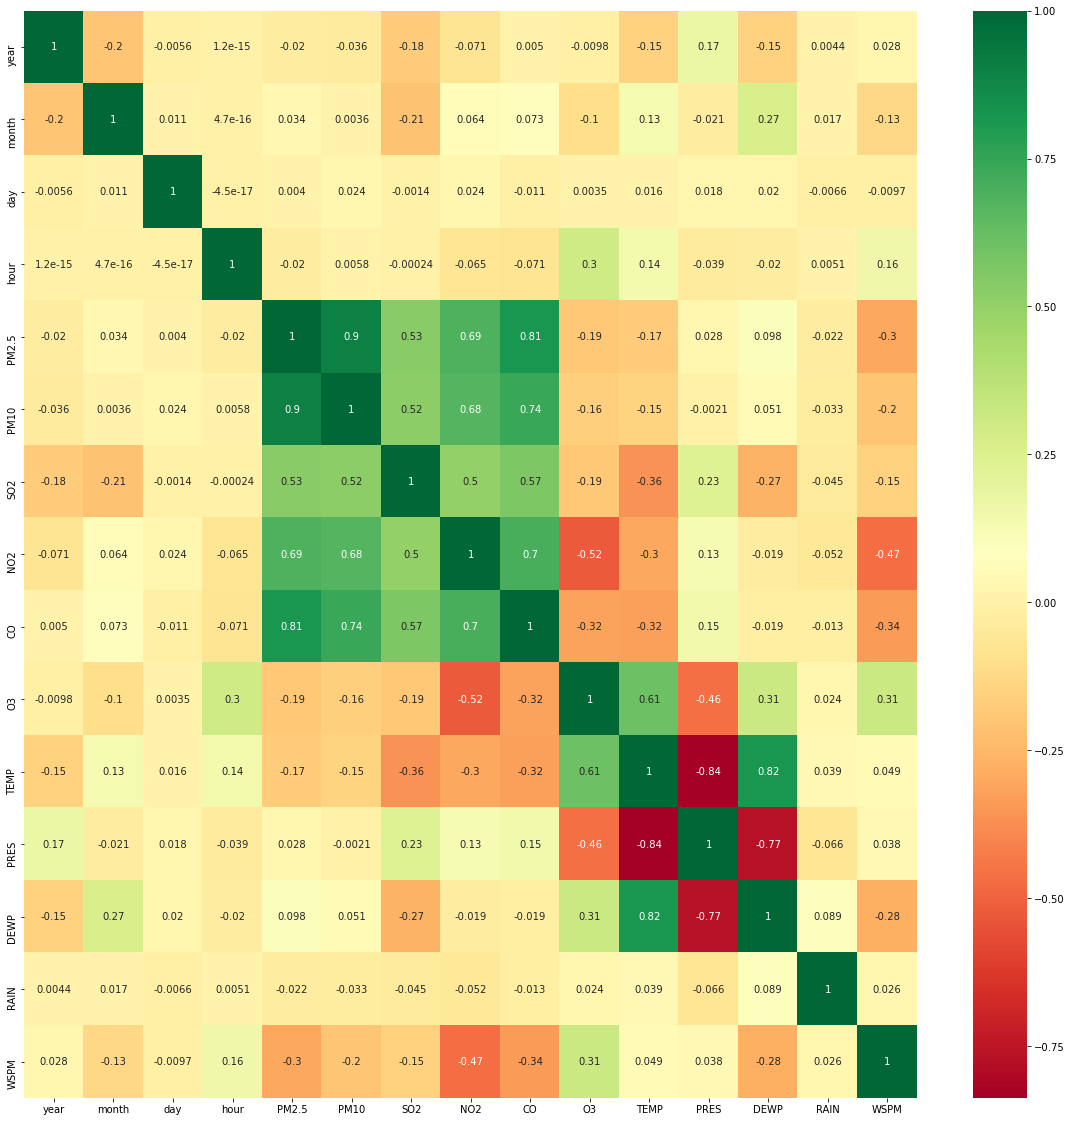

In [339]:
# Matrica korelacija!

import seaborn as sns
corrmat = df_Nongzhanguan.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df_Nongzhanguan[top_corr_features].corr(),annot=True,cmap="RdYlGn")